# EDA - Education resource predictor

In [1]:
import urllib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [94]:
df = pd.read_csv("../raw_data/all_expanded_ML.csv")

## Memory Optimization

In [95]:
def compress(df, **kwargs):
    """
    Reduces the size of the DataFrame by downcasting numerical columns
    """
    input_size = df.memory_usage(index=True).sum()/ 1024**2
    print("old dataframe size: ", round(input_size,2), 'MB')
    
    in_size = df.memory_usage(index=True).sum()

    for t in ["float", "integer"]:
        l_cols = list(df.select_dtypes(include=t))

        for col in l_cols:
            df[col] = pd.to_numeric(df[col], downcast=t)

    out_size = df.memory_usage(index=True).sum()
    ratio = (1 - round(out_size / in_size, 2)) * 100
    
    print("optimized size by {} %".format(round(ratio,2)))
    print("new DataFrame size: ", round(out_size / 1024**2,2), " MB")

    return df

In [96]:
df = compress(df, verbose=True)
df.head(1)

old dataframe size:  10.44 MB
optimized size by 39.0 %
new DataFrame size:  6.4  MB


Ano  Código_IBGE Localização  Aprovação  Reprovação  Abandono  Matrículas  \
0  2012      1100023       Rural  92.599998         4.0       3.4         498   

   Docentes  Estabelecimentos  Turmas  ...  Poverty_%  Unemployed_%  \
0        42                 1      15  ...  31.610001          6.35   

   Código_UF    Estado  UF  Município Região Acesso_a_internet_%  \
0         11  Rondônia  RO  Ariquemes  Norte                  21   

  Adjusted_population  Adjusted_funding  
0            13912.05       5327668.086  

[1 rows x 22 columns]

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62172 entries, 0 to 62171
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Ano                  62172 non-null  int16  
 1   Código_IBGE          62172 non-null  int32  
 2   Localização          62172 non-null  object 
 3   Aprovação            62172 non-null  float32
 4   Reprovação           62172 non-null  float32
 5   Abandono             62172 non-null  float32
 6   Matrículas           62172 non-null  int32  
 7   Docentes             62172 non-null  int32  
 8   Estabelecimentos     62172 non-null  int16  
 9   Turmas               62172 non-null  int16  
 10  Magreza_total_%      62172 non-null  float32
 11  PIB                  62172 non-null  float64
 12  Poverty_%            62172 non-null  float32
 13  Unemployed_%         62172 non-null  float32
 14  Código_UF            62172 non-null  int8   
 15  Estado               62172 non-null 

In [98]:
df.Código_UF = df.Código_UF.astype("int16")
df["Acesso_a_internet_%"] = df["Acesso_a_internet_%"].astype("int16")

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62172 entries, 0 to 62171
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Ano                  62172 non-null  int16  
 1   Código_IBGE          62172 non-null  int32  
 2   Localização          62172 non-null  object 
 3   Aprovação            62172 non-null  float32
 4   Reprovação           62172 non-null  float32
 5   Abandono             62172 non-null  float32
 6   Matrículas           62172 non-null  int32  
 7   Docentes             62172 non-null  int32  
 8   Estabelecimentos     62172 non-null  int16  
 9   Turmas               62172 non-null  int16  
 10  Magreza_total_%      62172 non-null  float32
 11  PIB                  62172 non-null  float64
 12  Poverty_%            62172 non-null  float32
 13  Unemployed_%         62172 non-null  float32
 14  Código_UF            62172 non-null  int16  
 15  Estado               62172 non-null 

In [100]:
columns_to_convert = ['Localização', 'UF', 'Município', 'Região']
for col in columns_to_convert:
    df[col] = df[col].astype('category')


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62172 entries, 0 to 62171
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Ano                  62172 non-null  int16   
 1   Código_IBGE          62172 non-null  int32   
 2   Localização          62172 non-null  category
 3   Aprovação            62172 non-null  float32 
 4   Reprovação           62172 non-null  float32 
 5   Abandono             62172 non-null  float32 
 6   Matrículas           62172 non-null  int32   
 7   Docentes             62172 non-null  int32   
 8   Estabelecimentos     62172 non-null  int16   
 9   Turmas               62172 non-null  int16   
 10  Magreza_total_%      62172 non-null  float32 
 11  PIB                  62172 non-null  float64 
 12  Poverty_%            62172 non-null  float32 
 13  Unemployed_%         62172 non-null  float32 
 14  Código_UF            62172 non-null  int16   
 15  Estado             

## Clean Data

In [10]:
df.describe()

Ano   Código_IBGE     Aprovação    Reprovação      Abandono  \
count  62172.000000  6.217200e+04  62172.000000  62172.000000  62172.000000   
mean    2016.018658  3.166202e+06     84.262245      8.477551      7.260202   
std        2.580877  1.018599e+06     10.435561      7.314059      6.689737   
min     2012.000000  1.100015e+06      0.000000      0.000000      0.000000   
25%     2014.000000  2.406809e+06     77.699997      2.900000      2.100000   
50%     2016.000000  3.131802e+06     85.300003      7.000000      5.900000   
75%     2018.000000  4.110003e+06     92.199997     12.300000     10.600000   
max     2020.000000  5.300108e+06    100.000000    100.000000    100.000000   

          Matrículas       Docentes  Estabelecimentos        Turmas  \
count   62172.000000   62172.000000      62172.000000  62172.000000   
mean      996.959339      76.345155          2.906115     31.044345   
std      5998.539678    1058.160622         11.200469    149.817023   
min         0.000000       0.000000          0.000000      0.000000   
25%       154.000000      15.000000          1.000000      6.000000   
50%       316.000000      23.000000          1.000000     12.000000   
75%       696.000000      46.000000          2.000000     24.000000   
max    430352.000000  179976.000000        694.000000  12010.000000   

       Magreza_total_%           PIB     Poverty_%  Unemployed_%  \
count     62172.000000  62172.000000  62172.000000  62172.000000   
mean          3.750925  26778.143641     27.971497      9.924197   
std           2.893270  11251.731789     14.644274      3.507049   
min           0.000000   9009.127144      7.980000      2.875000   
25%           2.380000  16919.841890     14.540000      7.250000   
50%           3.570000  25021.801740     21.000000      9.350000   
75%           4.810000  36219.335320     42.970001     12.350000   
max         100.000000  90742.750390     55.919998     20.174999   

          Código_UF  Acesso_a_internet_%  Adjusted_population  \
count  62172.000000         62172.000000         6.217200e+04   
mean      31.510921            55.707215         2.679314e+04   
std       10.164249            16.267792         1.654634e+05   
min       11.000000            21.000000         2.026500e+02   
25%       24.000000            44.000000         3.717050e+03   
50%       31.000000            56.000000         8.104750e+03   
75%       41.000000            69.000000         1.848750e+04   
max       53.000000            86.000000         1.047645e+07   

       Adjusted_funding  
count      6.217200e+04  
mean       1.064420e+07  
std        5.064723e+07  
min        0.000000e+00  
25%        1.601524e+06  
50%        3.710356e+06  
75%        9.339107e+06  
max        3.970060e+09

In [11]:
df.shape

(62172, 22)

In [102]:
df = df.drop_duplicates()

In [103]:
df = df.dropna(how='any', axis=0)

In [104]:
df.shape

(62157, 22)

In [15]:
## Domain specific clearning?? Think!!

## Data Visualization 

### Analysis of Aprovação, Reprovação and Abandono

#### General Overview - Distribution

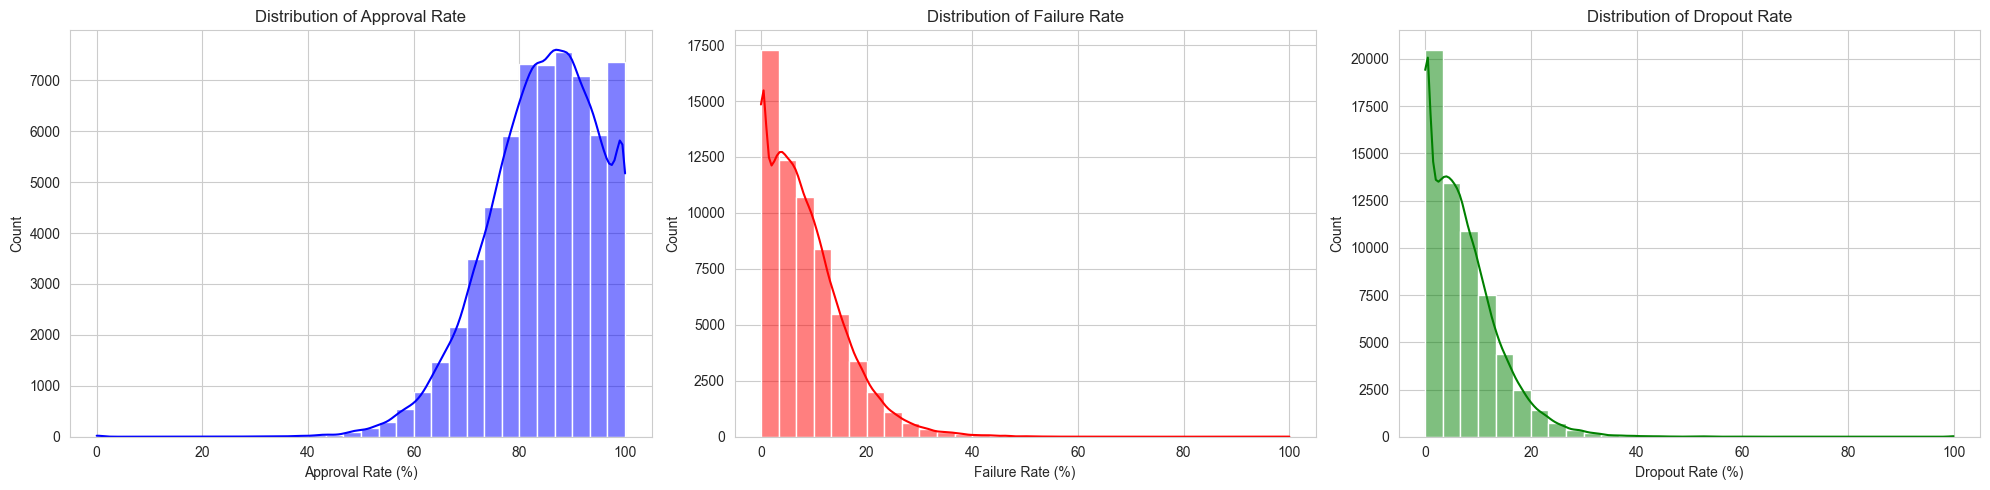

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set_style("whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

# Plot the distribution of Approval rate
sns.histplot(df['Aprovação'], bins=30, kde=True, ax=axes[0], color='blue')
axes[0].set_title('Distribution of Approval Rate')
axes[0].set_xlabel('Approval Rate (%)')

# Plot the distribution of Failure rate
sns.histplot(df['Reprovação'], bins=30, kde=True, ax=axes[1], color='red')
axes[1].set_title('Distribution of Failure Rate')
axes[1].set_xlabel('Failure Rate (%)')

# Plot the distribution of Dropout rate
sns.histplot(df['Abandono'], bins=30, kde=True, ax=axes[2], color='green')
axes[2].set_title('Distribution of Dropout Rate')
axes[2].set_xlabel('Dropout Rate (%)')

plt.tight_layout()
plt.show()


#### General overview - outliers

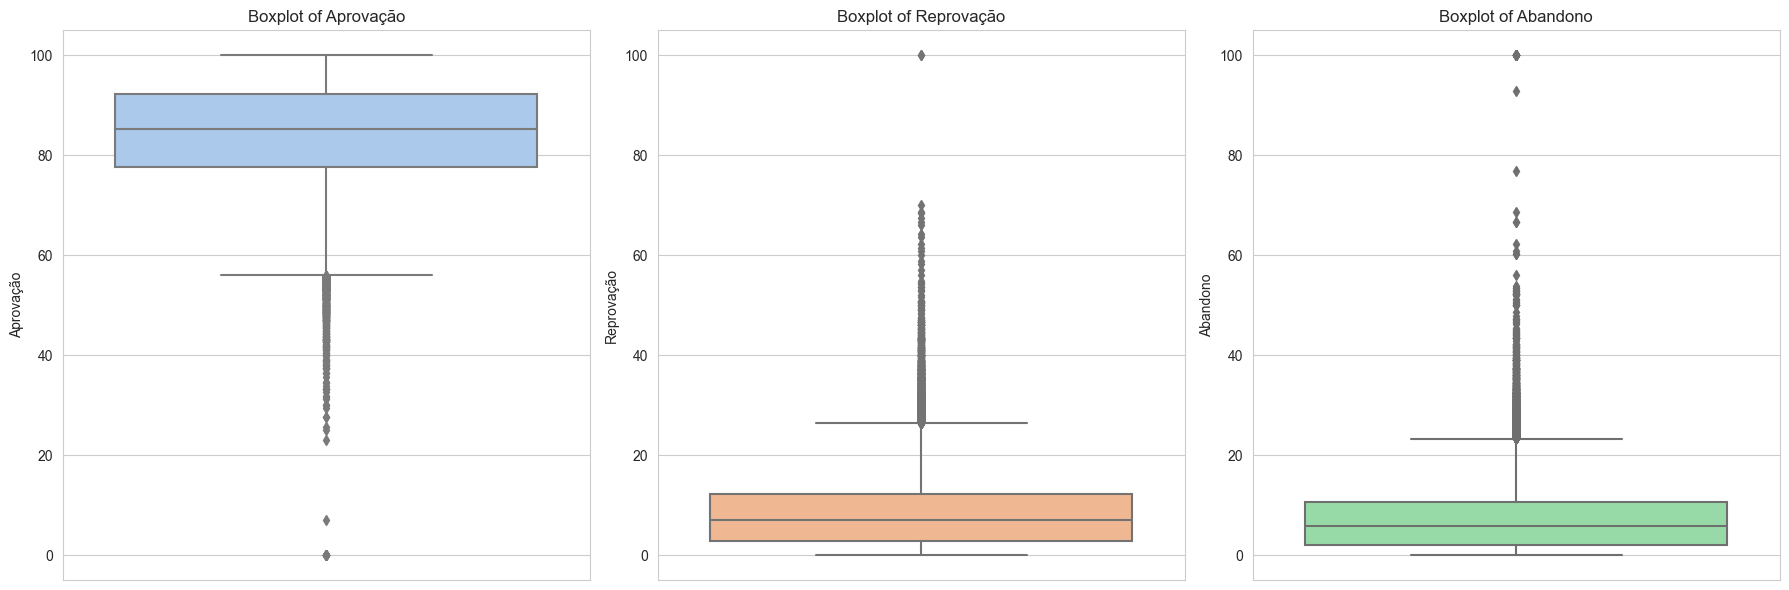

In [17]:
# Features for box plotting
boxplot_features = ['Aprovação', 'Reprovação', 'Abandono']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plotting box plots for each feature
for idx, feature in enumerate(boxplot_features):
    sns.boxplot(y=df[feature], ax=axes[idx], color=sns.color_palette("pastel")[idx])
    axes[idx].set_title(f'Boxplot of {feature}')
    axes[idx].set_ylabel(feature)

plt.tight_layout()
plt.show()

#### Trend Analysis

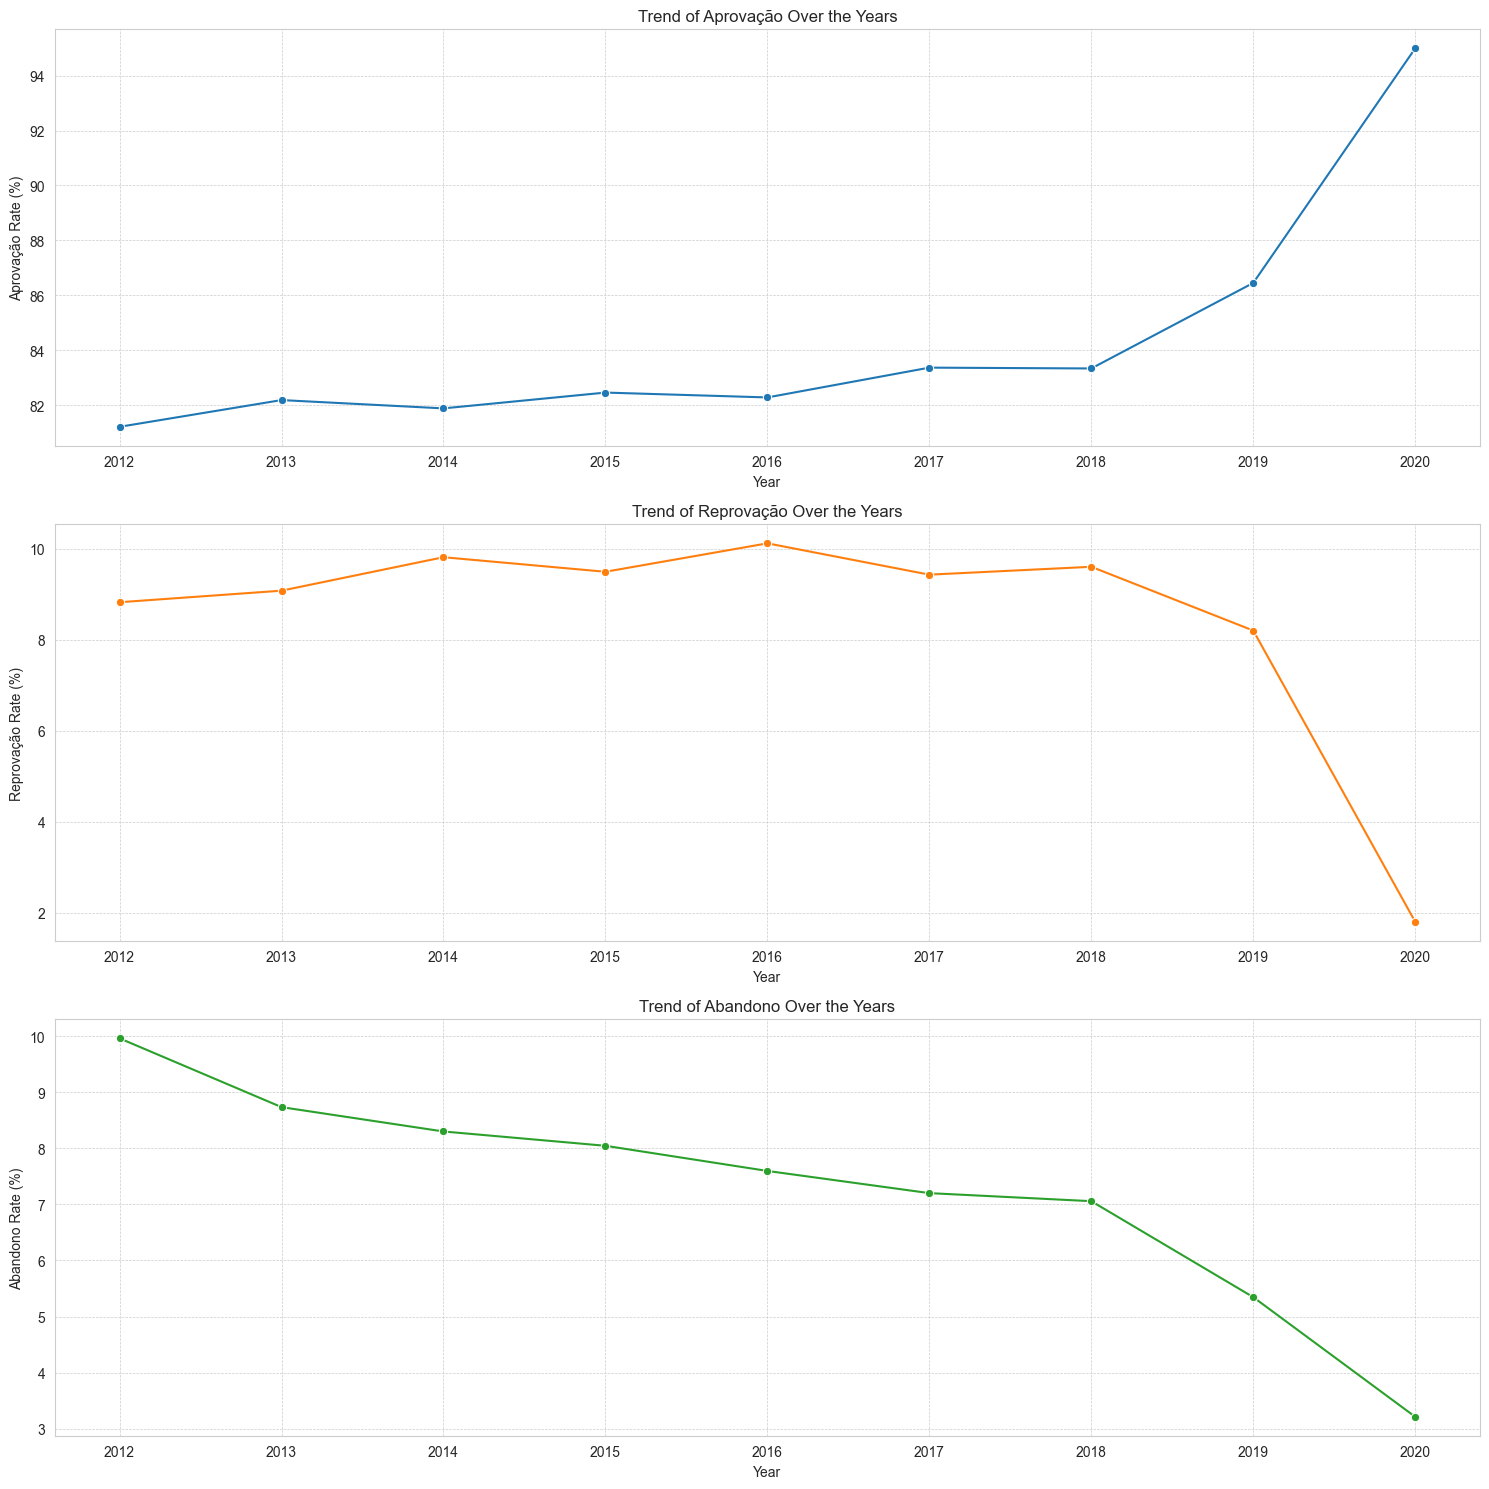

In [18]:
# Features for trend analysis
trend_features = ['Aprovação', 'Reprovação', 'Abandono']

# Group by year and calculate the mean for each feature
yearly_means = df.groupby('Ano')[trend_features].mean()

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 15))

# Plotting trends for each feature
for idx, feature in enumerate(trend_features):
    ax = axes[idx]
    sns.lineplot(x=yearly_means.index, y=yearly_means[feature], ax=ax, marker='o', color=sns.color_palette("tab10")[idx])
    ax.set_title(f'Trend of {feature} Over the Years')
    ax.set_xlabel('Year')
    ax.set_ylabel(f'{feature} Rate (%)')
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

#### Comparison Analysis using Localização

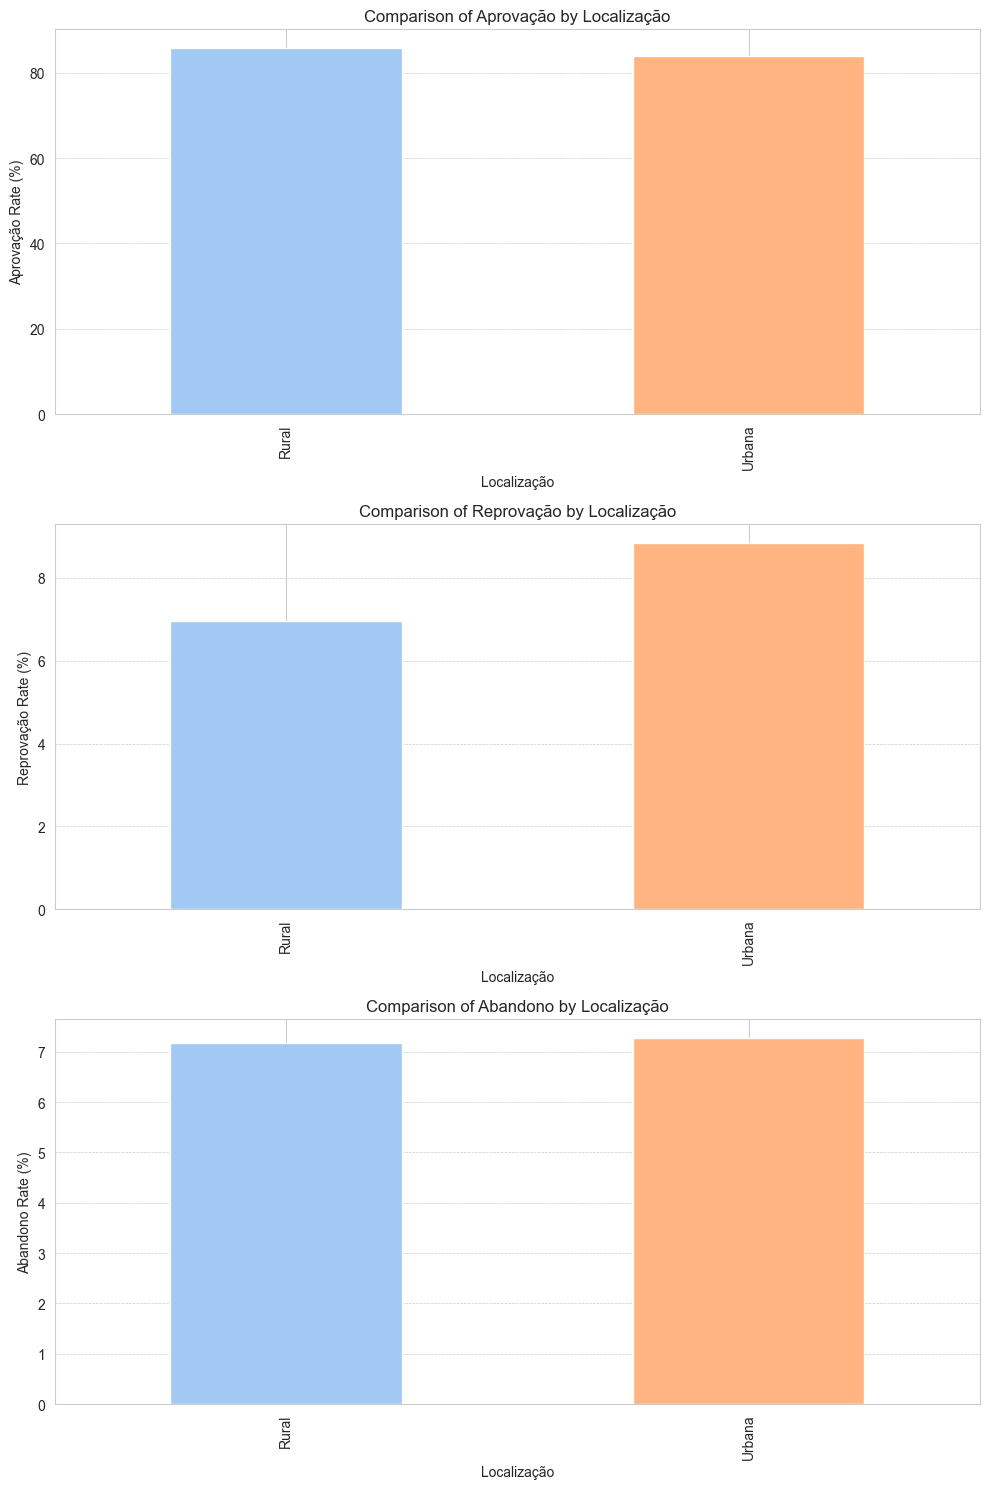

In [19]:
# Group by 'Localização' and calculate the mean for each feature
location_means = df.groupby('Localização')[trend_features].mean()

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Plotting bar plots for each feature
for idx, feature in enumerate(trend_features):
    ax = axes[idx]
    location_means[feature].plot(kind='bar', ax=ax, color=sns.color_palette("pastel", 2))
    ax.set_title(f'Comparison of {feature} by Localização')
    ax.set_ylabel(f'{feature} Rate (%)')
    ax.set_xlabel('Localização')
    ax.grid(True, which='both', linestyle='--', linewidth=0.5, axis='y')

plt.tight_layout()
plt.show()


#### Comparison analysis using Região

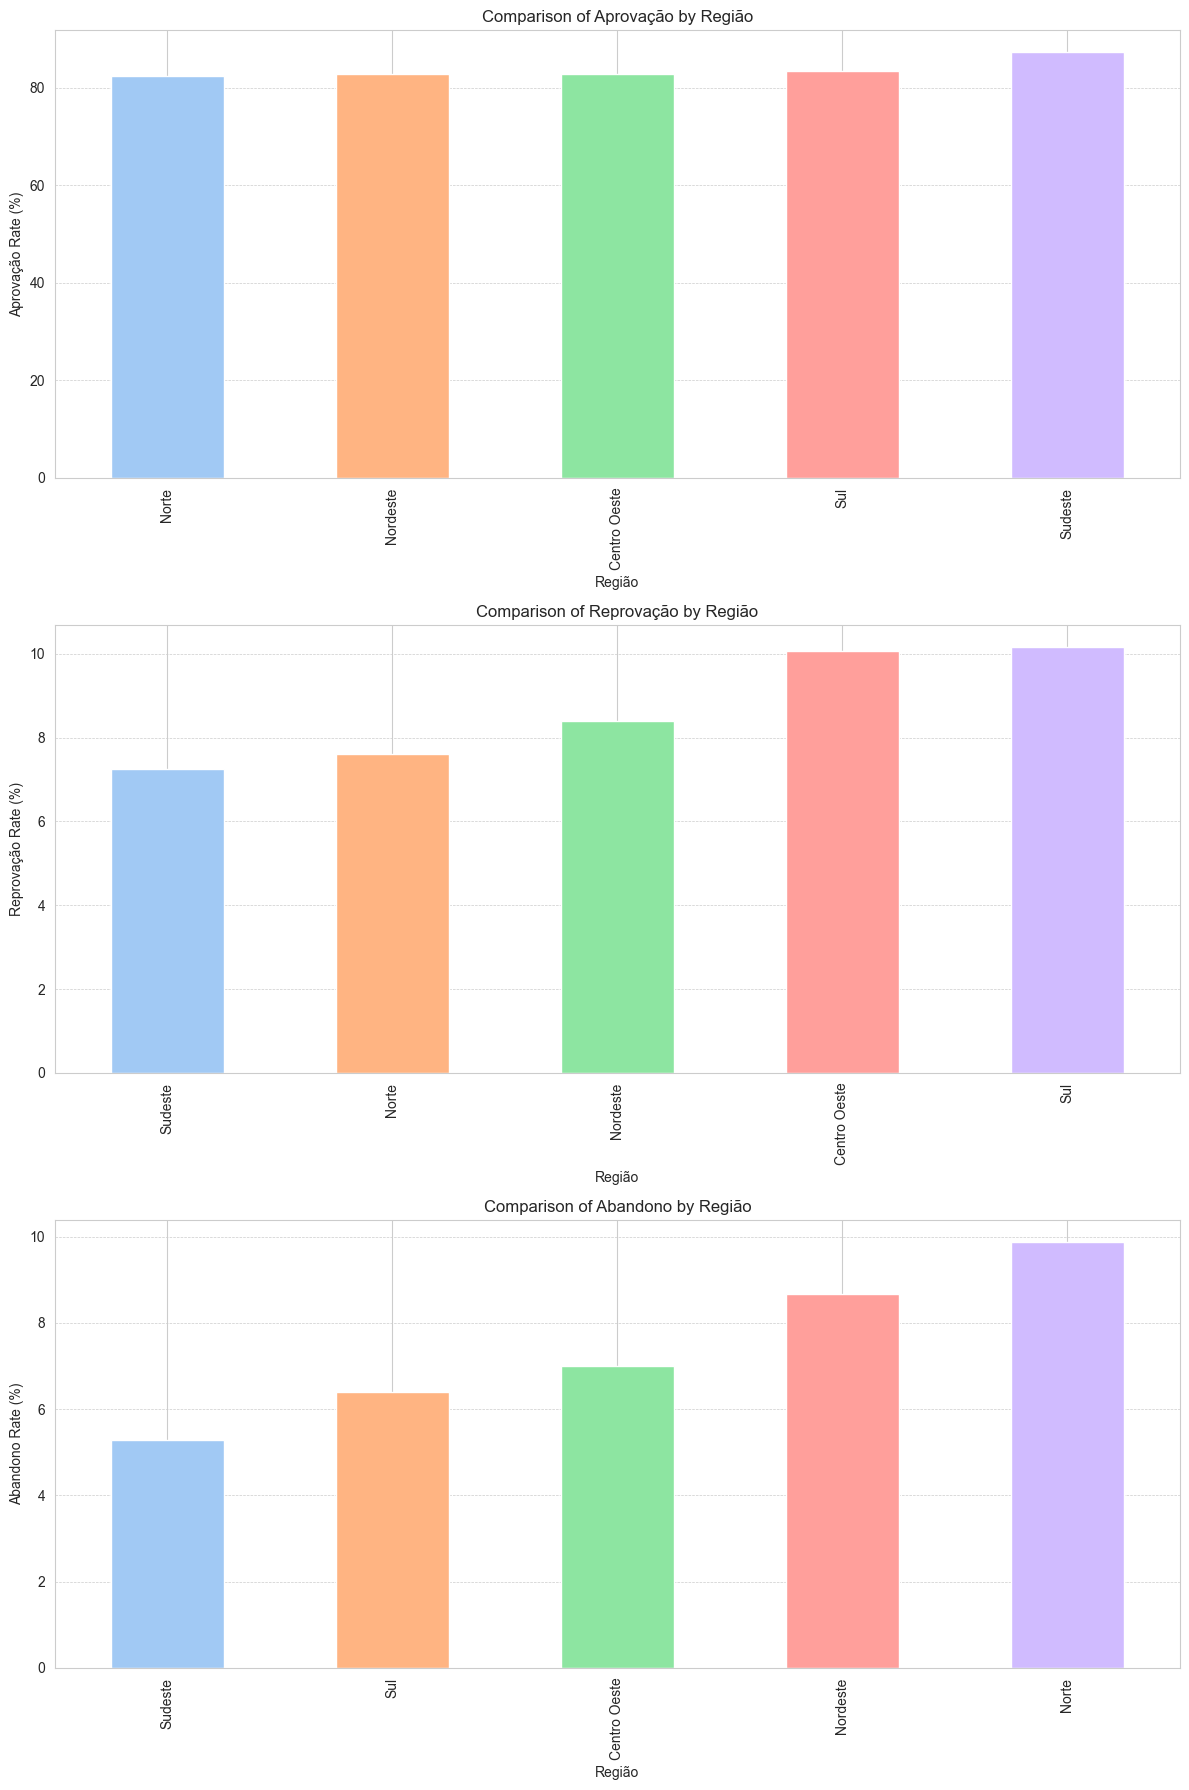

In [20]:
# Group by 'Região' and calculate the mean for each feature
region_means = df.groupby('Região')[trend_features].mean()

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 18))

# Plotting bar plots for each feature
for idx, feature in enumerate(trend_features):
    ax = axes[idx]
    region_means[feature].sort_values().plot(kind='bar', ax=ax, color=sns.color_palette("pastel", len(region_means)))
    ax.set_title(f'Comparison of {feature} by Região')
    ax.set_ylabel(f'{feature} Rate (%)')
    ax.set_xlabel('Região')
    ax.grid(True, which='both', linestyle='--', linewidth=0.5, axis='y')

plt.tight_layout()
plt.show()


#### Corelation Analysis

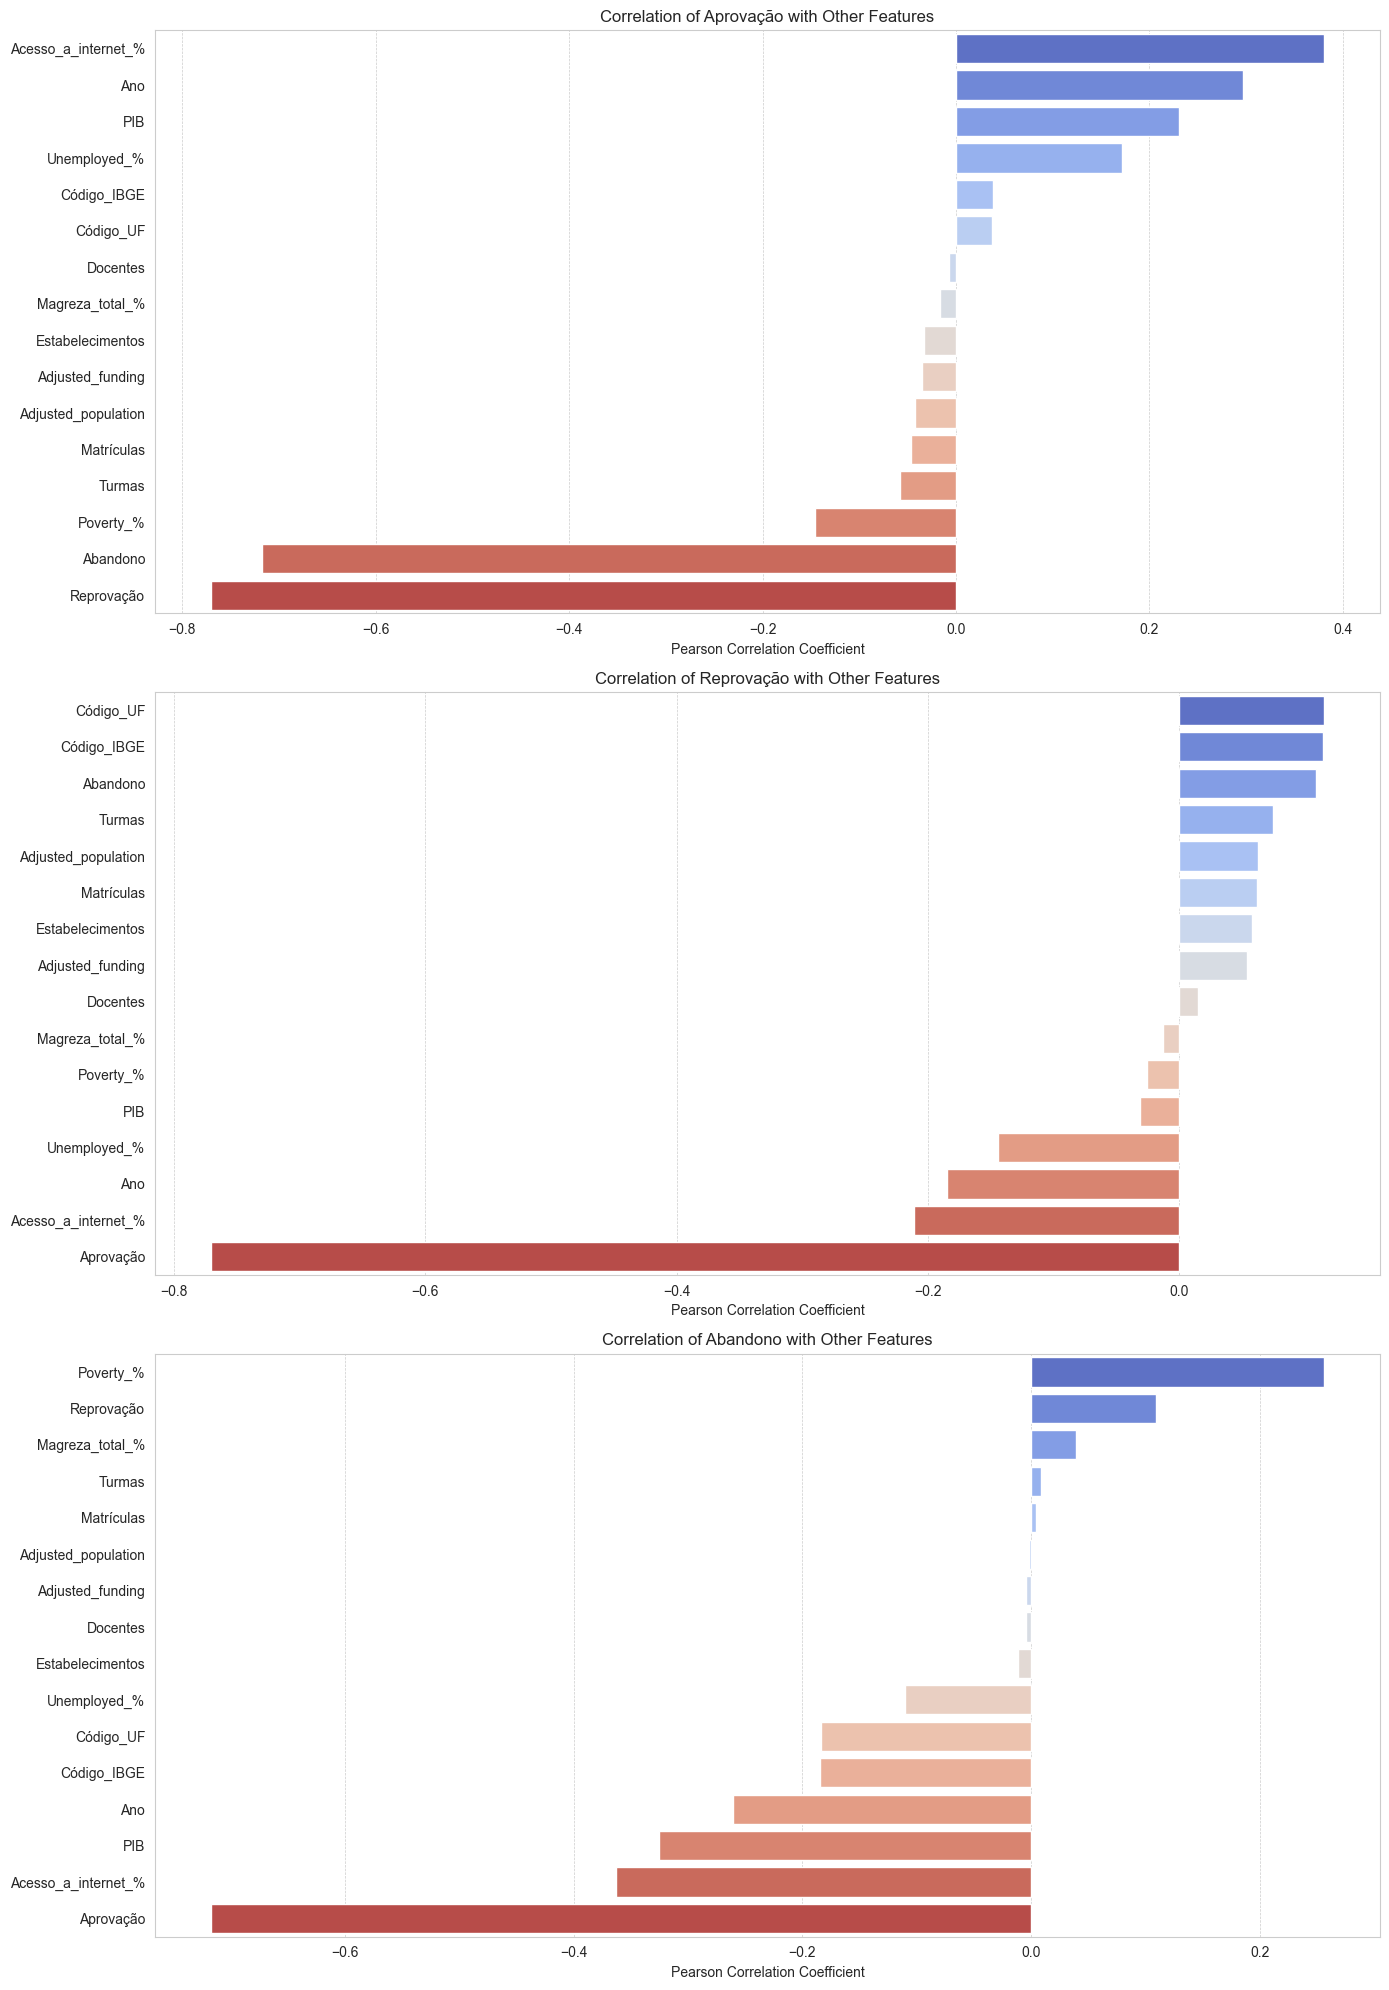

In [42]:
df_numeric = df.select_dtypes(include=['number'])

# Define the list of features for correlation analysis
features_to_correlate = ['Aprovação', 'Reprovação', 'Abandono']

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14, 20))

# Plotting the correlations for each feature
for idx, feature in enumerate(features_to_correlate):
    correlation_values = df_numeric.corr()[feature].drop(feature)
    sorted_correlations = correlation_values.sort_values(ascending=False)
    
    sns.barplot(x=sorted_correlations.values, y=sorted_correlations.index, palette="coolwarm", ax=axes[idx])
    axes[idx].set_title(f'Correlation of {feature} with Other Features')
    axes[idx].set_xlabel('Pearson Correlation Coefficient')
    axes[idx].grid(True, which='both', linestyle='--', linewidth=0.5, axis='x')

plt.tight_layout()
plt.show()


#### Summary

- Socio-economic factors like GDP per capita, poverty rates, and unemployment rates play a significant role in influencing educational outcomes across municipalities.
- There are clear regional disparities in educational outcomes, with the Northern and Northeastern regions facing more challenges compared to others.
- Urban areas, generally show better educational outcomes than rural areas.

Aproval Rates:
- General Distribution & Box-Plot: The approval rates in most municipalities are high, with the median above 85%. There are some outliers at the lower end, indicating a few municipalities with unusually low approval rates.
- Trend Over Time: Approval rates have been increasing gradually over the years, showcasing a positive trend in educational outcomes.
- Comparison using Região: The Northern and Northeastern regions have lower approval rates compared to other regions, with the South having the highest.
- Comparison using Localização:  Urban areas have slightly lower approval rate compared to urban areas (counterintuitive).
- Correlation Analysis:
    - Positive correlation with features like GDP per capita (PIB) and internet access, suggesting regions with higher GDP or better internet access tend to have higher approval rates.
    - Negative correlation with features like Poverty_% and Unemployed_%, indicating that regions with higher poverty or unemployment rates tend to have lower approval rates.

Failure Rates:
- General Distribution & Box-Plot: The data is spread more evenly, with a median failure rate around 10%. Outliers are present on both the lower and higher ends.
- Trend Over Time: The failure rates have been decreasing over the years, indicating improvements in educational outcomes.
- Comparison using Região: The Northern region has the highest failure rate, followed by the Northeast. The South has the lowest.
- Urban areas have higher failure rate compared to rural areas (counterintuitive).
- Correlation Analysis:
    - Positive correlation with Poverty_% and Unemployed_%, suggesting regions with these challenges might also face higher failure rates.
    - Negative correlation with features like GDP per capita (PIB).

Dropout Rates:
- General Distribution & Box-Plot: Most municipalities have very low dropout rates, with the median close to 0%. However, there are outliers at the higher end.
- Trend Over Time: Dropout rates have been decreasing over the years, but the decline has been more subtle compared to failure rates.
- Comparison using Região: The Northern region has the highest dropout rate, whereas the South and Southeast have the lowest.
- Comparison using Localização: Urban areas generally have lower dropout rates than rural areas.
- Correlation Analysis:
    - Similar patterns as with Reprovação, but correlations are generally weaker.

### Analysis of Matrículas, Docentes, Estabelecimentos and Turmas

#### General overview - Distribution & Outliers

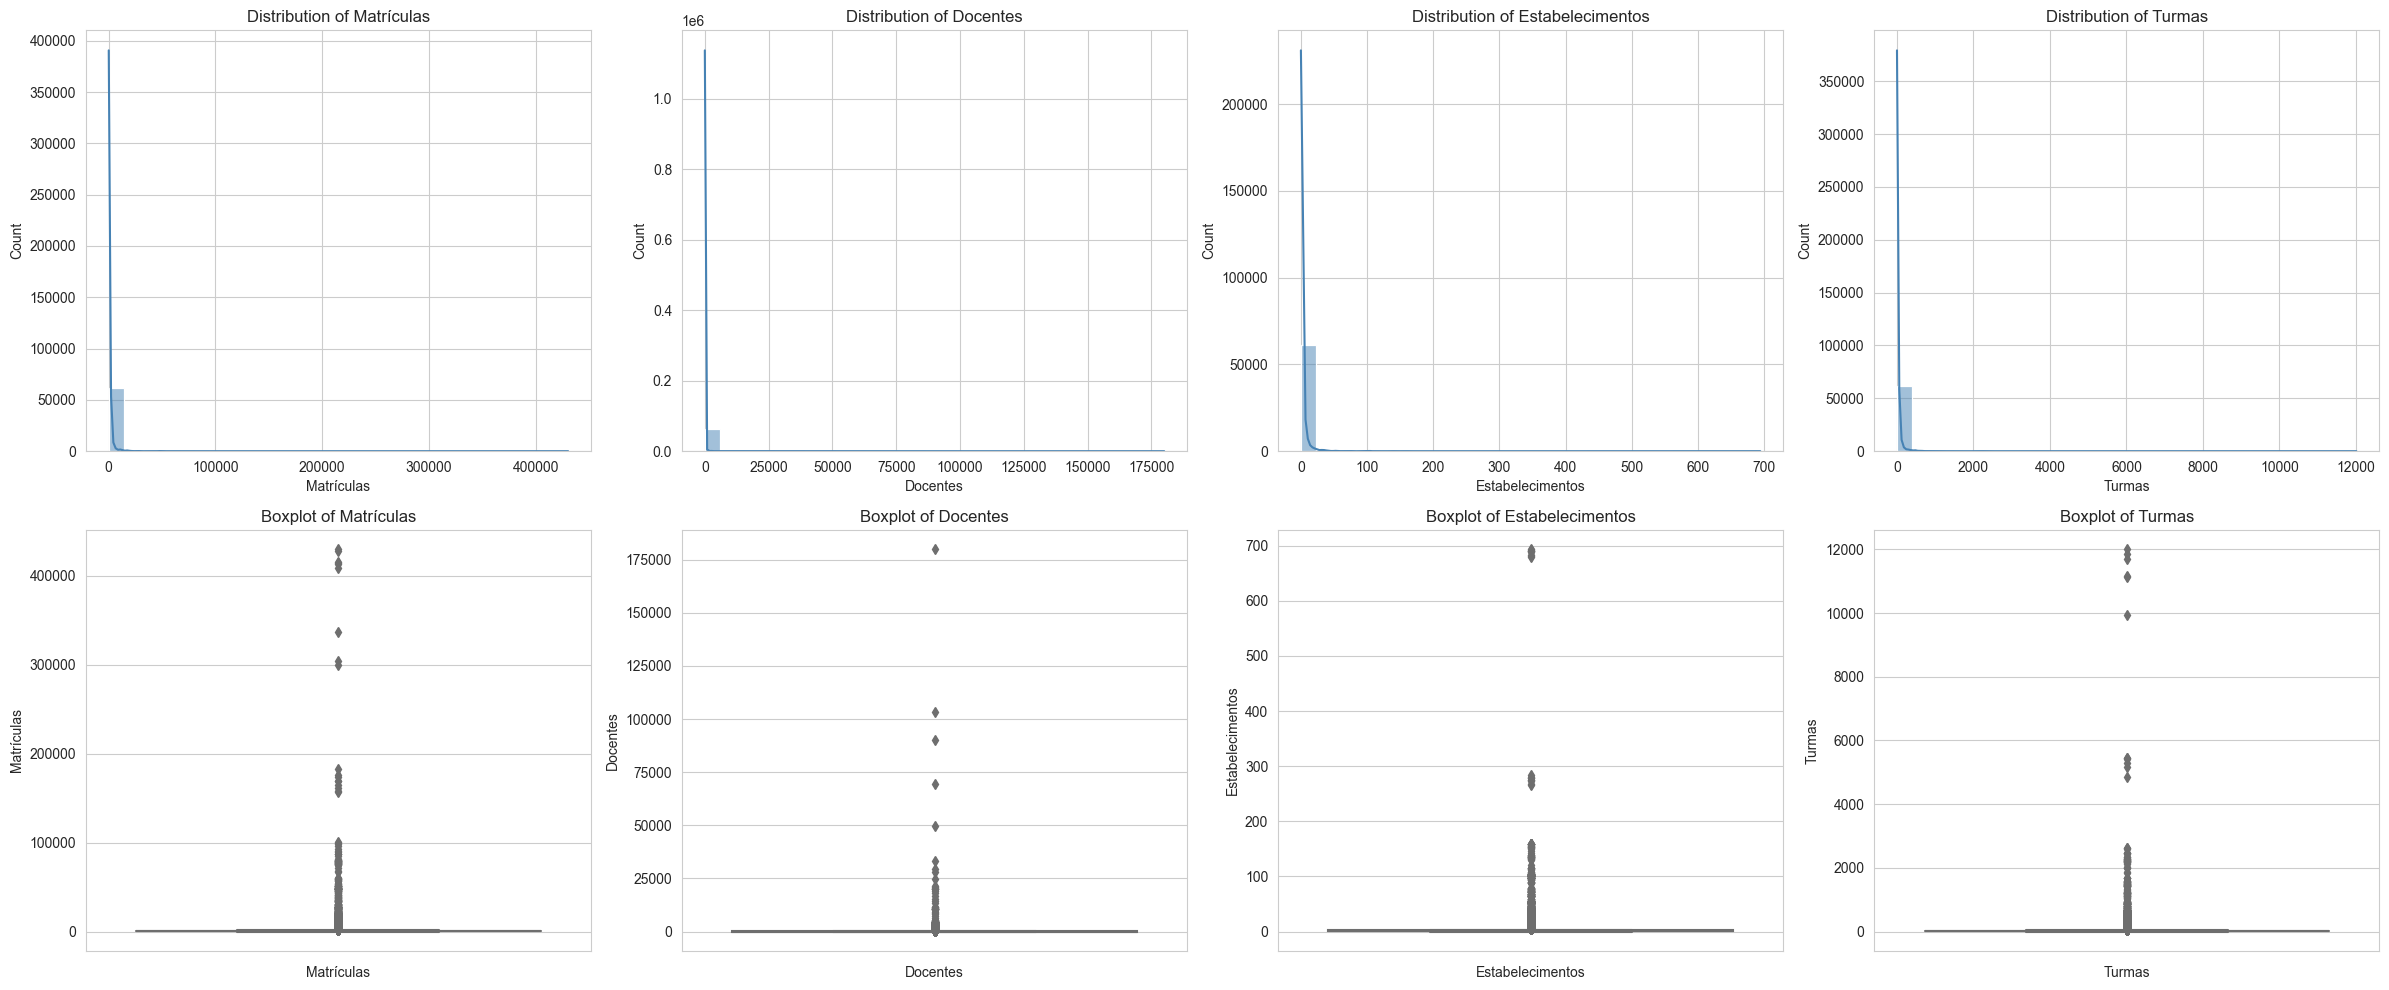

In [23]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(24, 10))

# List of features to analyze
features = ['Matrículas', 'Docentes', 'Estabelecimentos', 'Turmas']

# Plotting distributions and boxplots for each feature
for idx, feature in enumerate(features):
    sns.histplot(df[feature], bins=30, kde=True, ax=axes[0, idx], color='steelblue')
    axes[0, idx].set_title(f'Distribution of {feature}')
    axes[0, idx].set_xlabel(feature)
    
    sns.boxplot(y=df[feature], ax=axes[1, idx], color='lightcoral')
    axes[1, idx].set_title(f'Boxplot of {feature}')
    axes[1, idx].set_xlabel(feature)

plt.tight_layout()
plt.show()


In [24]:
# perform the same after removing outliers

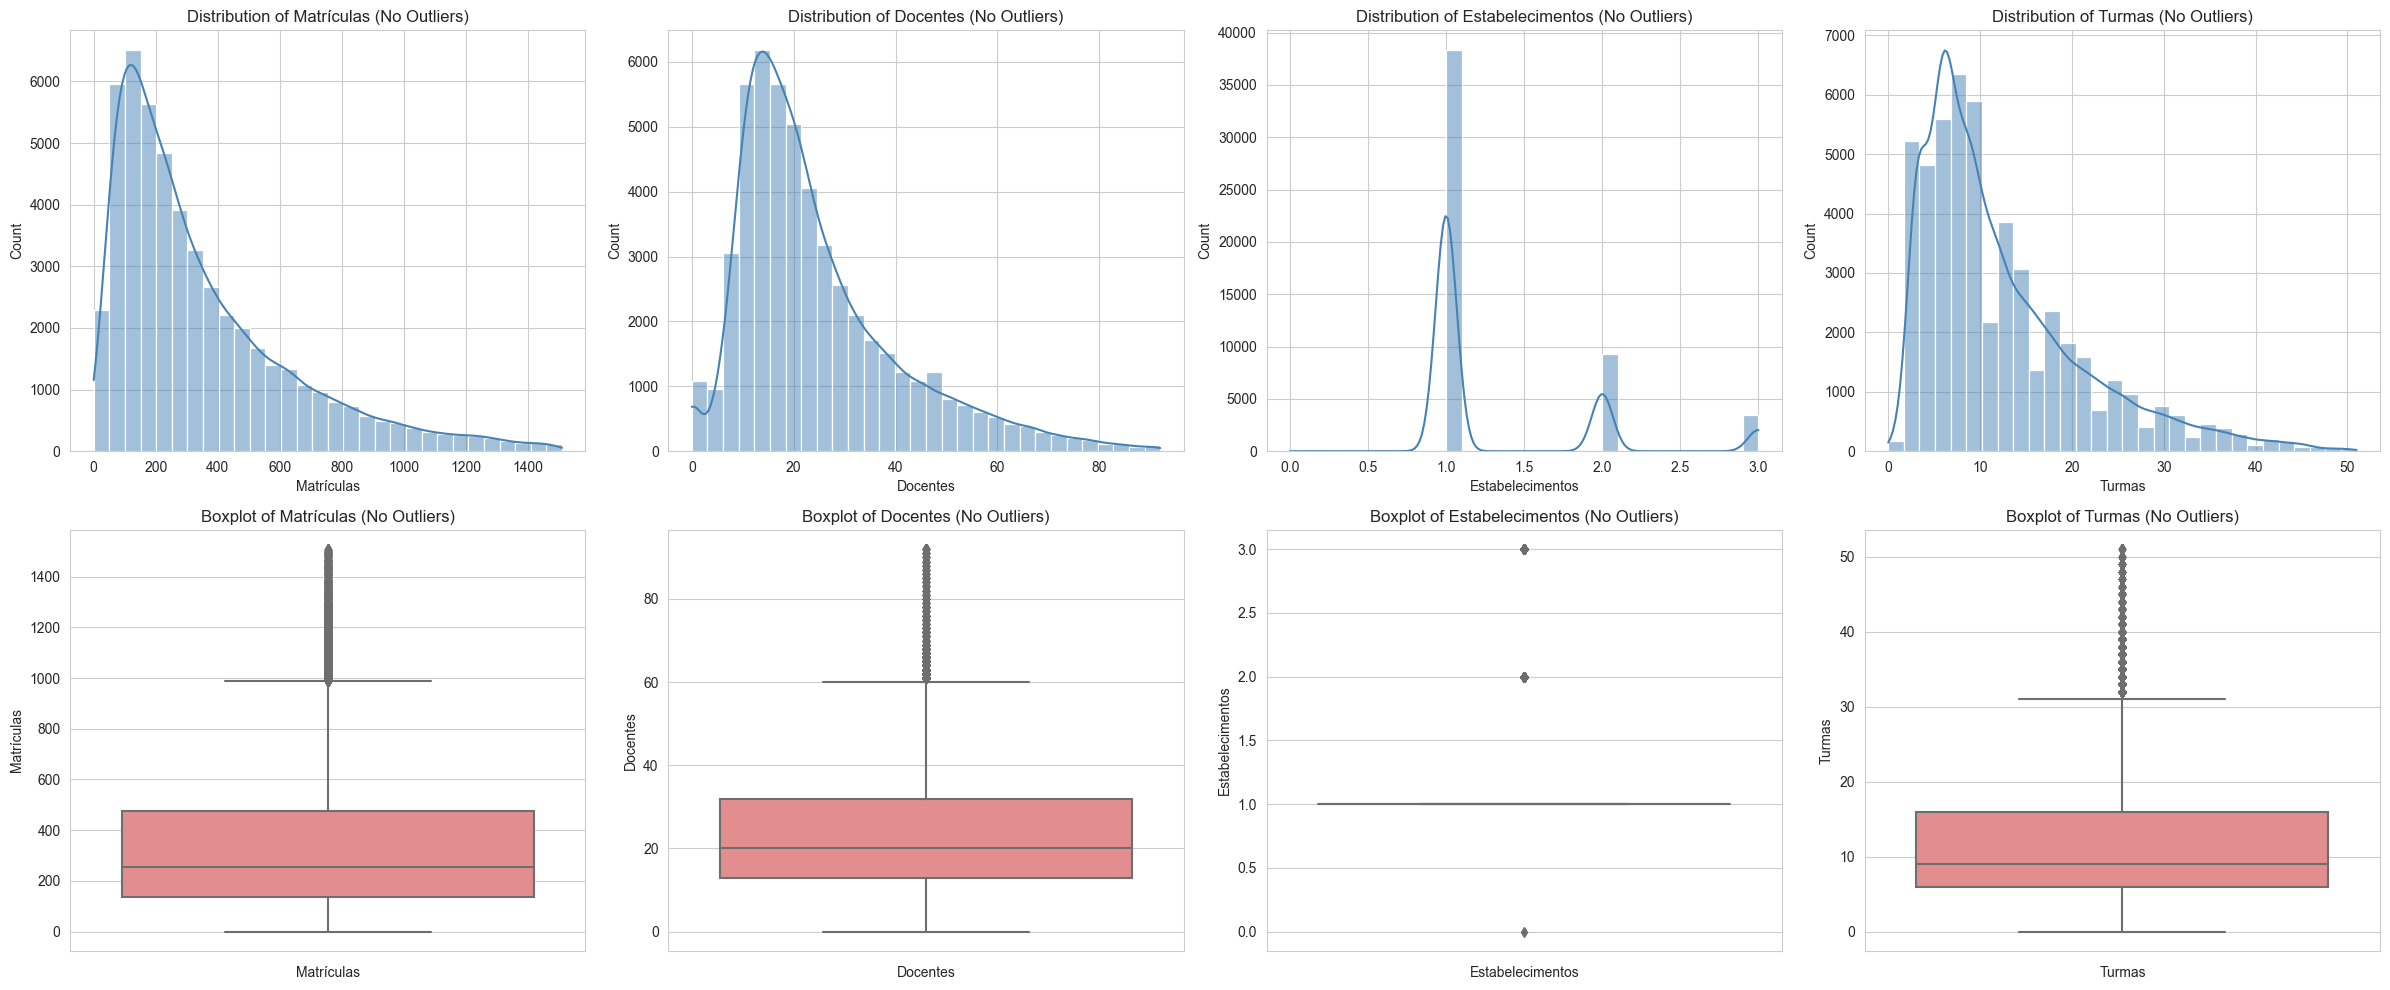

In [25]:
# Calculate IQR and bounds for each feature
features_bounds = {}

for feature in features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    features_bounds[feature] = (lower_bound, upper_bound)

# Filter out the outliers
df_no_outliers = df.copy()

for feature, (lower_bound, upper_bound) in features_bounds.items():
    df_no_outliers = df_no_outliers[(df_no_outliers[feature] >= lower_bound) & 
                                    (df_no_outliers[feature] <= upper_bound)]

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(24, 10))

# Plotting distributions and boxplots for each feature without outliers
for idx, feature in enumerate(features):
    sns.histplot(df_no_outliers[feature], bins=30, kde=True, ax=axes[0, idx], color='steelblue')
    axes[0, idx].set_title(f'Distribution of {feature} (No Outliers)')
    axes[0, idx].set_xlabel(feature)
    
    sns.boxplot(y=df_no_outliers[feature], ax=axes[1, idx], color='lightcoral')
    axes[1, idx].set_title(f'Boxplot of {feature} (No Outliers)')
    axes[1, idx].set_xlabel(feature)

plt.tight_layout()
plt.show()


#### Trend Analysis

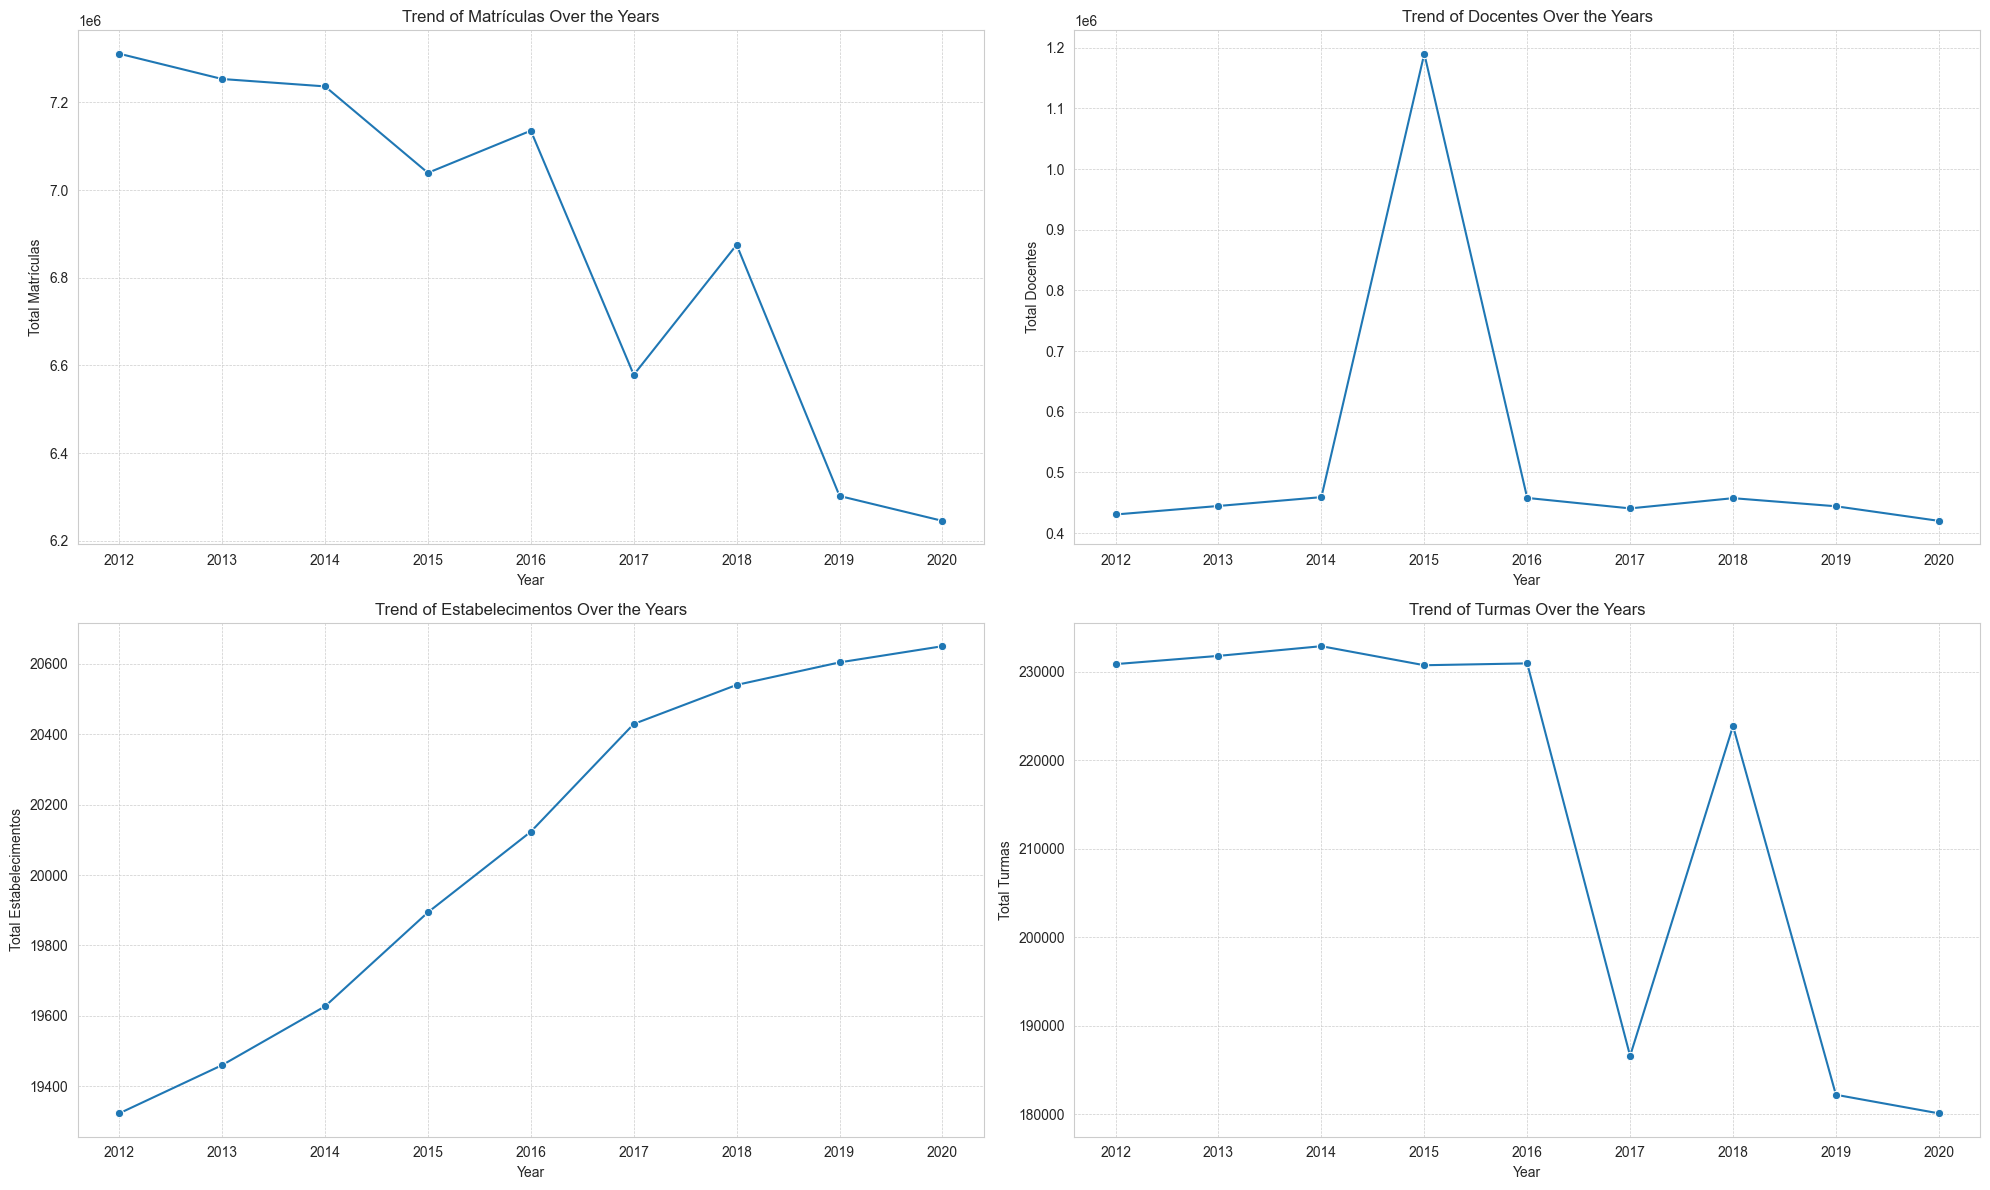

In [26]:
# Group by year and sum the values for each feature
yearly_sums = df.groupby('Ano')[features].sum()

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))

# Plotting trends for each feature
for idx, feature in enumerate(features):
    ax = axes[idx // 2, idx % 2]
    sns.lineplot(x=yearly_sums.index, y=yearly_sums[feature], ax=ax, marker='o')
    ax.set_title(f'Trend of {feature} Over the Years')
    ax.set_xlabel('Year')
    ax.set_ylabel(f'Total {feature}')
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

#### Comparison analysis - Using Localização &  Região

In [28]:
# Using Localização

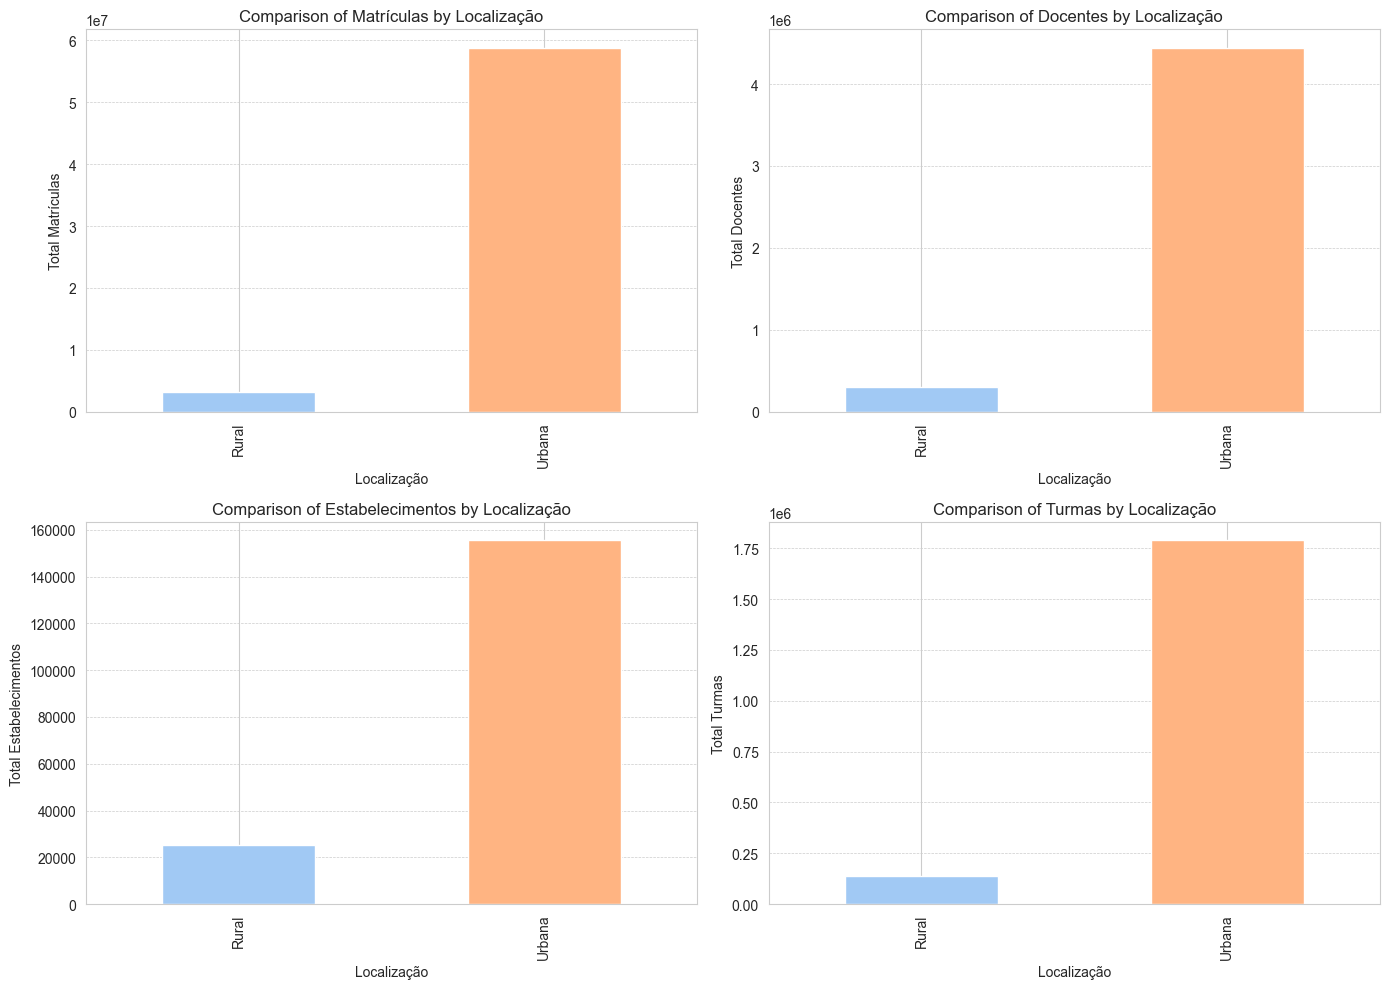

In [32]:
# Group by 'Localização' and calculate the sum for each feature
location_sums = df.groupby('Localização')[features].sum()

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Plotting bar plots for each feature
for idx, feature in enumerate(features):
    ax = axes[idx // 2, idx % 2]
    location_sums[feature].sort_values().plot(kind='bar', ax=ax, color=sns.color_palette("pastel", 2))
    ax.set_title(f'Comparison of {feature} by Localização')
    ax.set_ylabel(f'Total {feature}')
    ax.set_xlabel('Localização')
    ax.grid(True, which='both', linestyle='--', linewidth=0.5, axis='y')

plt.tight_layout()
plt.show()


In [29]:
# Using Região

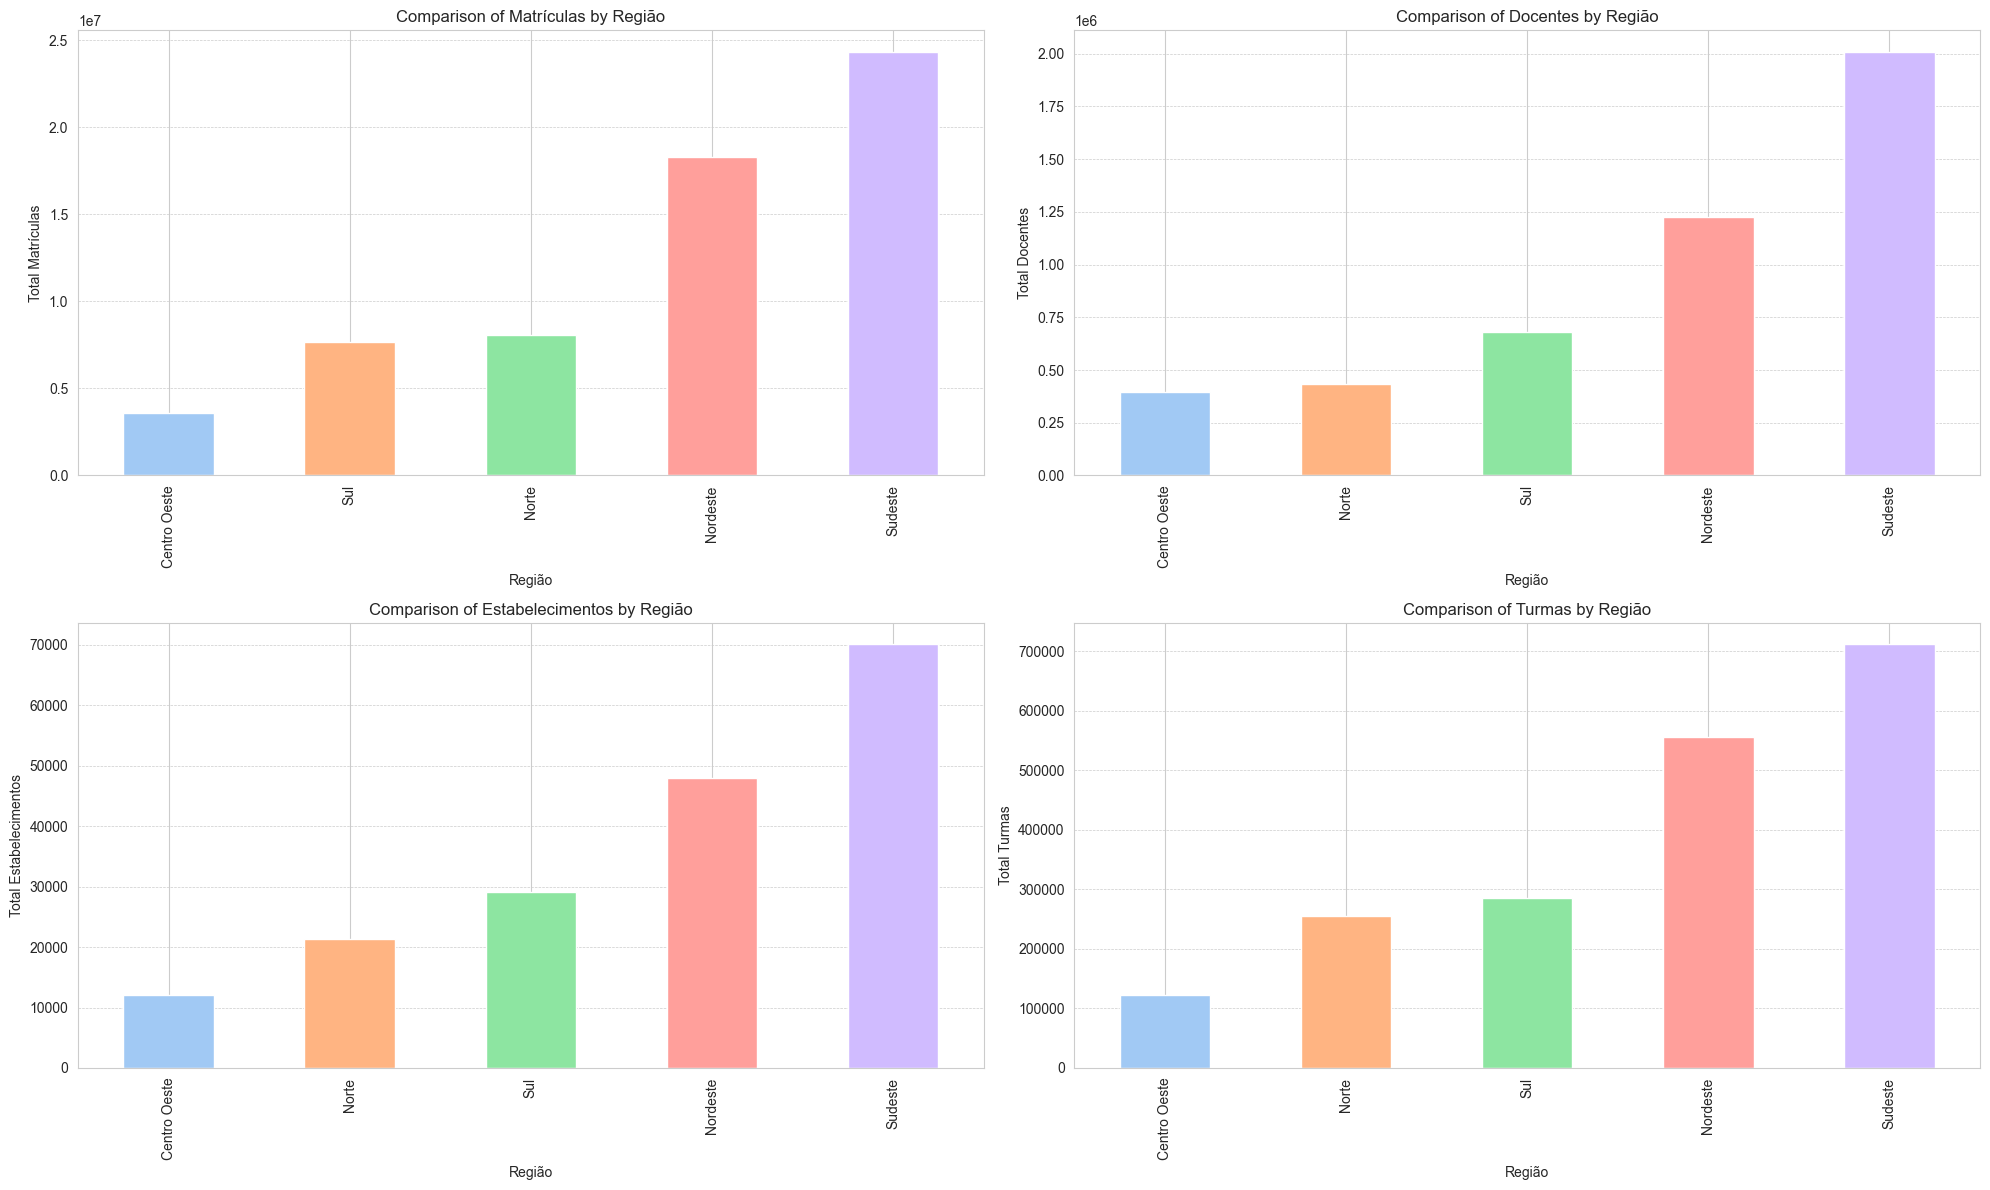

In [31]:
# Group by 'Região' and calculate the sum for each feature
region_sums = df.groupby('Região')[features].sum()

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))

# Plotting bar plots for each feature
for idx, feature in enumerate(features):
    ax = axes[idx // 2, idx % 2]
    region_sums[feature].sort_values().plot(kind='bar', ax=ax, color=sns.color_palette("pastel", len(region_sums)))
    ax.set_title(f'Comparison of {feature} by Região')
    ax.set_ylabel(f'Total {feature}')
    ax.set_xlabel('Região')
    ax.grid(True, which='both', linestyle='--', linewidth=0.5, axis='y')

plt.tight_layout()
plt.show()


#### Corelation analysis

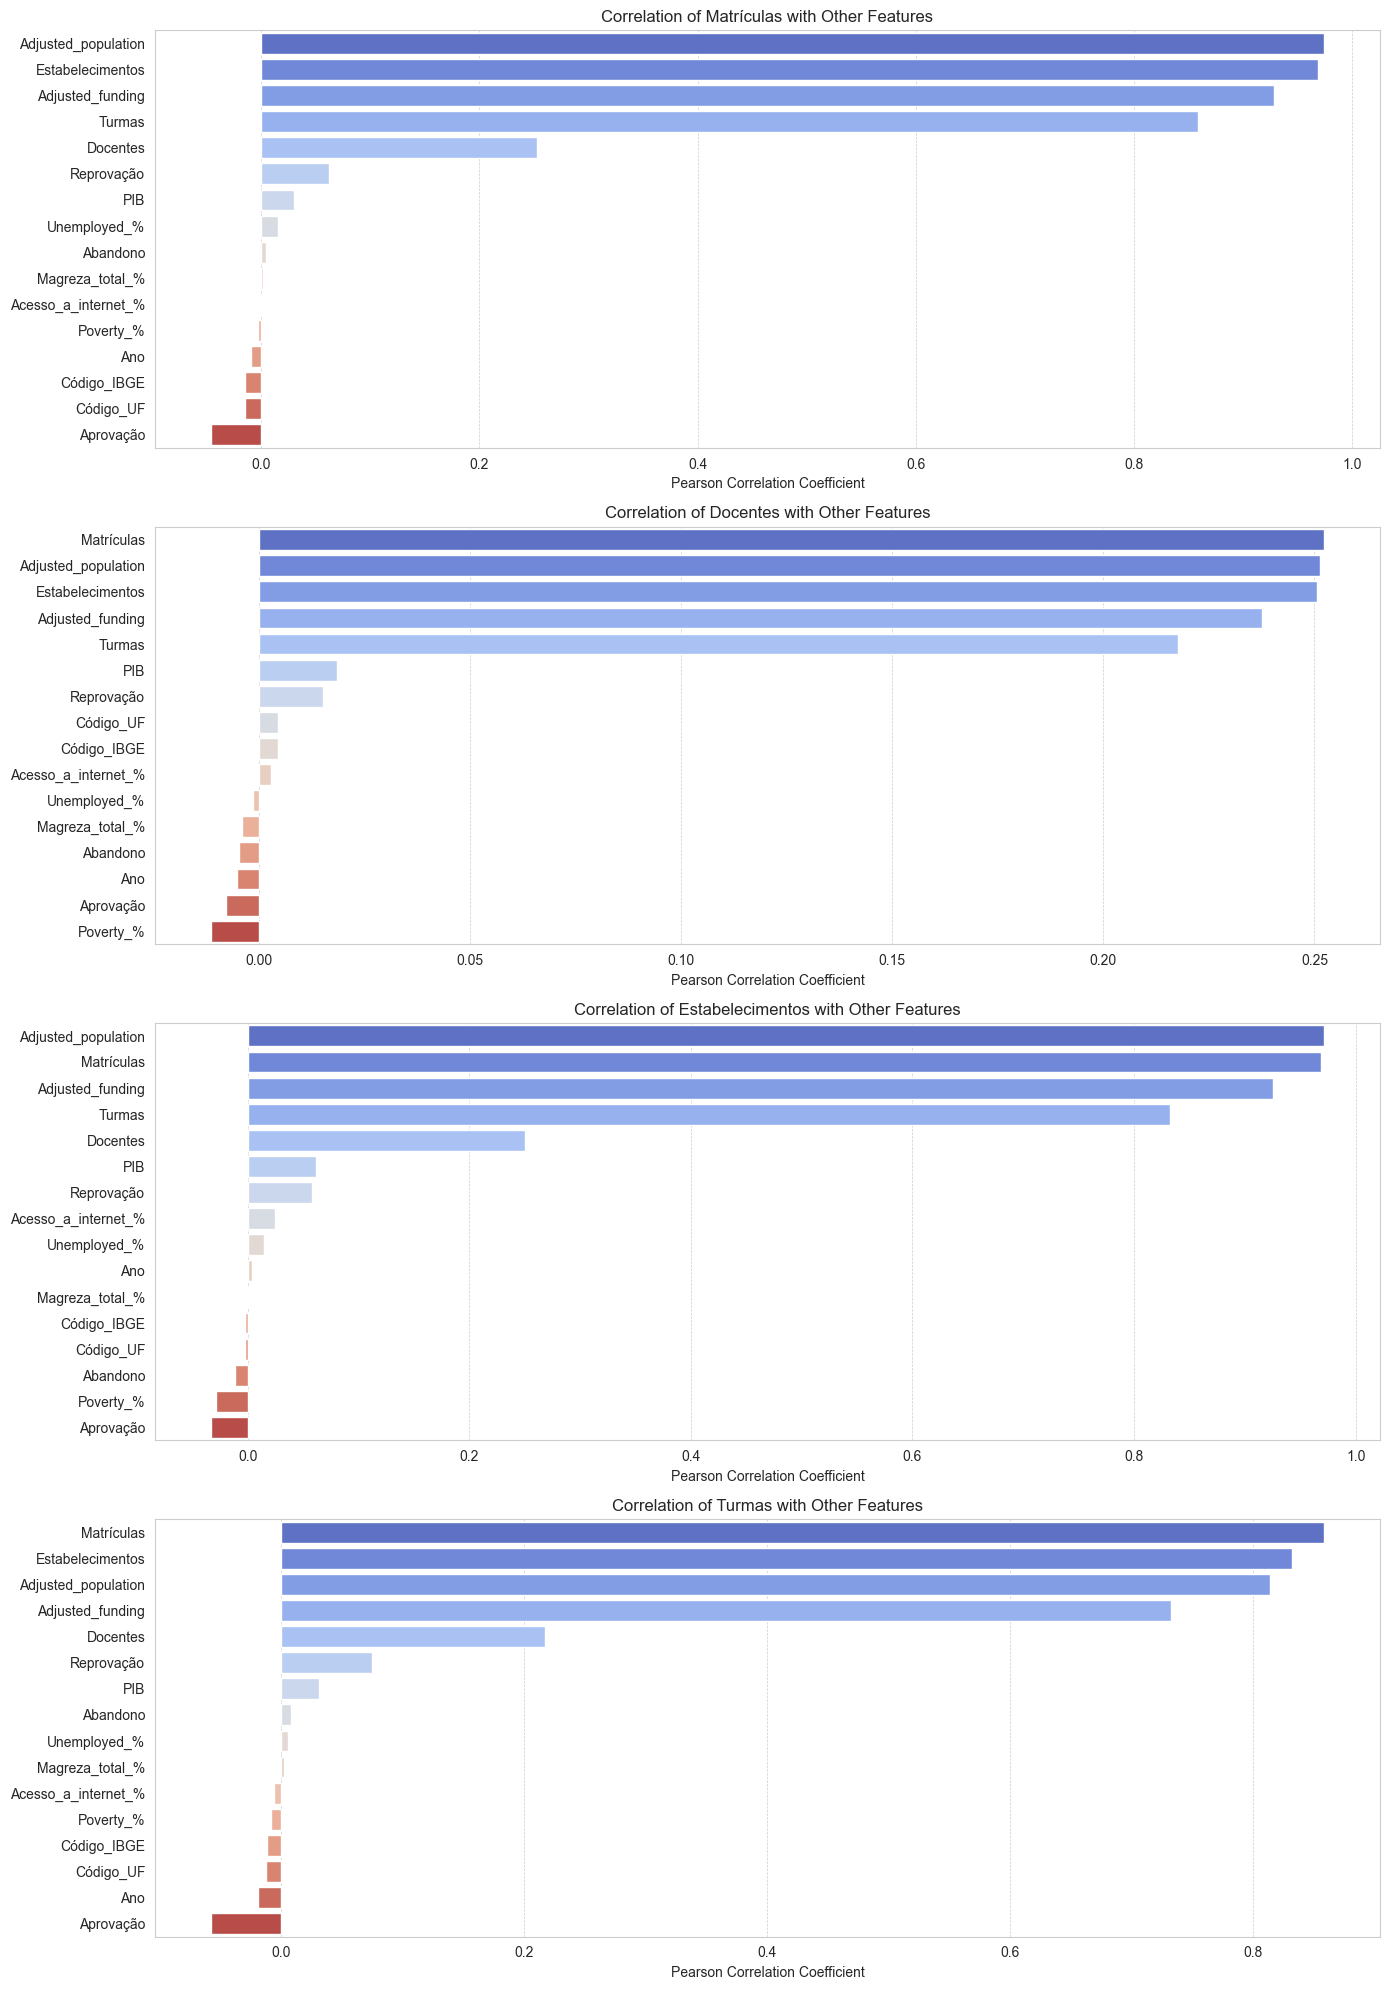

In [39]:
df_numeric = df.select_dtypes(include=['number'])

# Define the list of features for correlation analysis
features_to_correlate = ['Matrículas', 'Docentes', 'Estabelecimentos', 'Turmas']

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(14, 20))

# Plotting the correlations for each feature
for idx, feature in enumerate(features_to_correlate):
    correlation_values = df_numeric.corr()[feature].drop(feature)
    sorted_correlations = correlation_values.sort_values(ascending=False)
    
    sns.barplot(x=sorted_correlations.values, y=sorted_correlations.index, palette="coolwarm", ax=axes[idx])
    axes[idx].set_title(f'Correlation of {feature} with Other Features')
    axes[idx].set_xlabel('Pearson Correlation Coefficient')
    axes[idx].grid(True, which='both', linestyle='--', linewidth=0.5, axis='x')

plt.tight_layout()
plt.show()


#### Summary


These four features are closely interrelated, reflecting the size and scale of the educational infrastructure in a municipality.
Urban areas and more populous regions tend to have larger educational infrastructures.
Socio-economic factors also influence these features, with larger municipalities possibly having distinct socio-economic profiles.

Matrículas (Enrollments):
- General Distribution & Box-Plot: Most municipalities have varying sizes of enrollments, with a wide range of values. Some outliers indicate a few municipalities with unusually high enrollments.
- Trend Over Time: There's a general decline in the total enrollments over the years. The sharp drop after 2016 suggests a significant change or event that affected enrollments.
- Comparison using Região: Regions with larger populations, like the Southeast, tend to have higher enrollments. Conversely, less populous regions have lower enrollments.
- Comparison using Localização: Urban areas, due to higher population density, generally have more enrollments than rural areas.
- Correlation Analysis:
    - Strong positive correlations with Docentes, Estabelecimentos, and Turmas, indicating that municipalities with more enrollments generally have more teachers, educational establishments, and classes.
    - Also correlates with some socio-economic factors, suggesting that larger municipalities might have distinct socio-economic profiles.

Docentes (Teachers):
- General Distribution & Box-Plot: Distribution is wide, indicating a variety of municipality sizes in terms of the number of teachers. Some outliers have unusually high numbers.
- Trend Over Time: The number of teachers has been relatively stable, except for the period 2014 to 2016, where there is an increase and then decrease. 
- Comparison using Região: Regions with larger populations tend to have more teachers.
- Comparison using Localização: Urban areas generally have more teachers due to the higher demand and infrastructure.
- Correlation Analysis:
    - Strong positive correlations with Matrículas, Estabelecimentos, and Turmas, indicating that larger municipalities in terms of enrollments and establishments also have more teachers.

Estabelecimentos (Establishments):
- General Distribution & Box-Plot: The number of educational establishments varies across municipalities, with some having significantly more establishments.
- Trend Over Time: The total number of establishments has been relatively stable, with a slight decrease over time.
- Comparison using Região: More populous regions have more educational establishments.
- Comparison using Localização: Urban areas generally have more establishments.
- Correlation Analysis:
    - Strong positive correlations with Matrículas, Docentes, and Turmas.

Turmas (Classes):
- General Distribution & Box-Plot: The number of classes varies across municipalities, reflecting the size and educational demand of the municipality.
- Trend Over Time: The number of classes has been relatively consistent over time.
- Comparison using Região: Regions with more enrollments and establishments also tend to have more classes.
- Comparison using Localização: Urban areas generally have more classes.
- Correlation Analysis:
    - Strong positive correlations with Matrículas, Docentes, and Estabelecimentos.

In [43]:
df.dtypes

Ano                       int16
Código_IBGE               int32
Localização            category
Aprovação               float32
Reprovação              float32
Abandono                float32
Matrículas                int32
Docentes                  int32
Estabelecimentos          int16
Turmas                    int16
Magreza_total_%         float32
PIB                     float64
Poverty_%               float32
Unemployed_%            float32
Código_UF                 int16
Estado                   object
UF                     category
Município              category
Região                 category
Acesso_a_internet_%       int16
Adjusted_population     float64
Adjusted_funding        float64
dtype: object

### Analysis of Socio-economic factors 

- Magreza_total_%
- PIB
- Poverty_%
- Unemployed_%
- Acesso_a_internet_%
- Adjusted_population
- Adjusted_funding

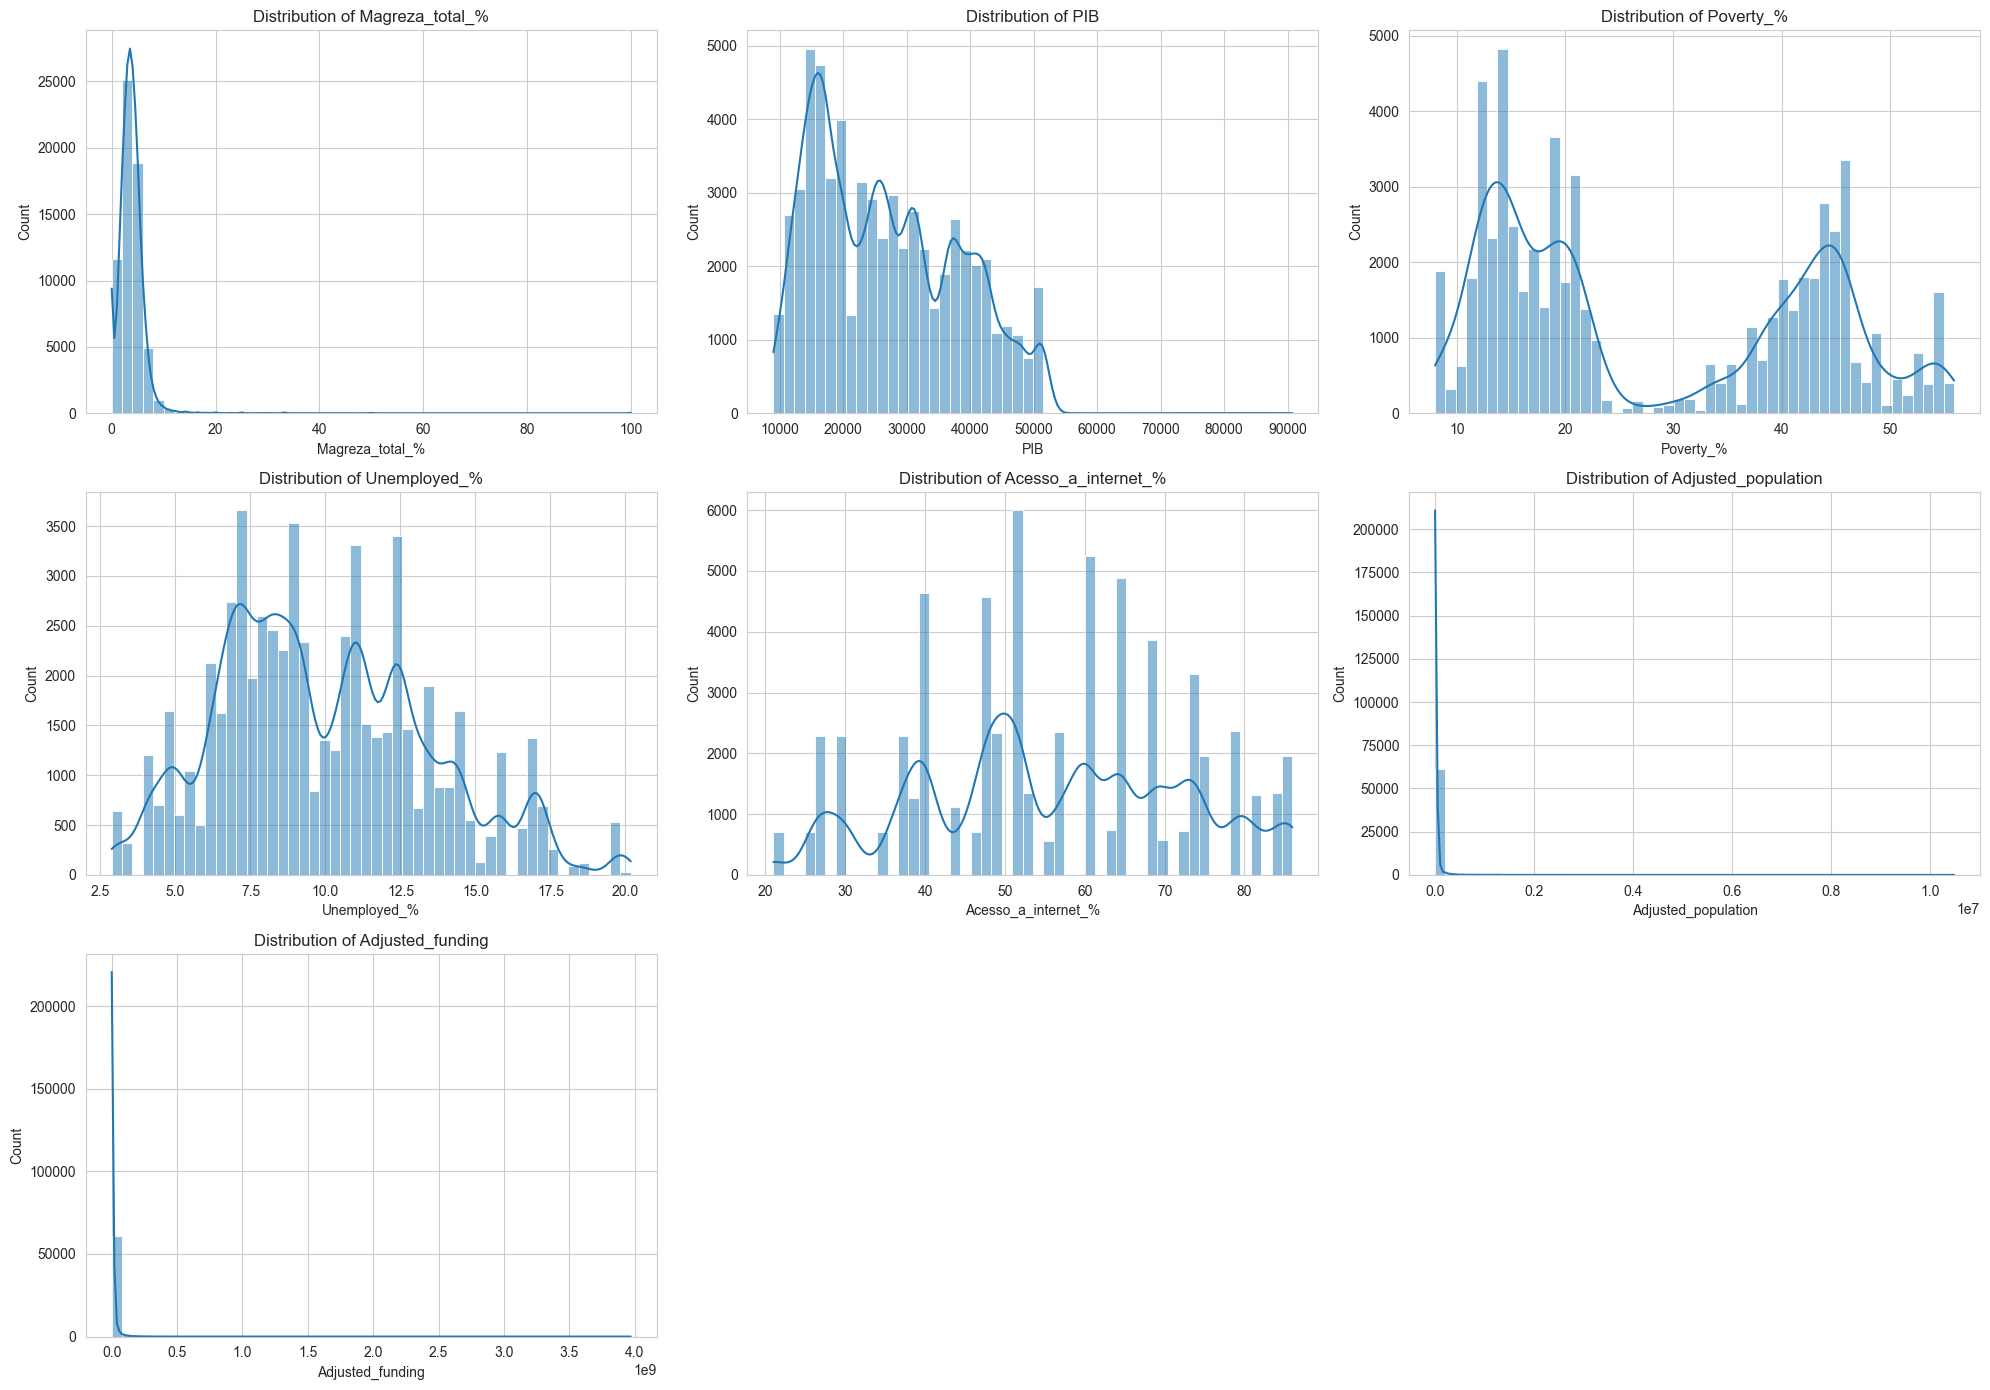

In [68]:
# Selecting the socio-economic features for EDA
selected_features = [
    'Magreza_total_%',
    'PIB',
    'Poverty_%',
    'Unemployed_%',
    'Acesso_a_internet_%',
    'Adjusted_population',
    'Adjusted_funding'
]

# Set up the matplotlib figure
plt.figure(figsize=(20, 14))

# Loop through each feature to plot
for i, feature in enumerate(selected_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[feature], bins=50, kde=True)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()


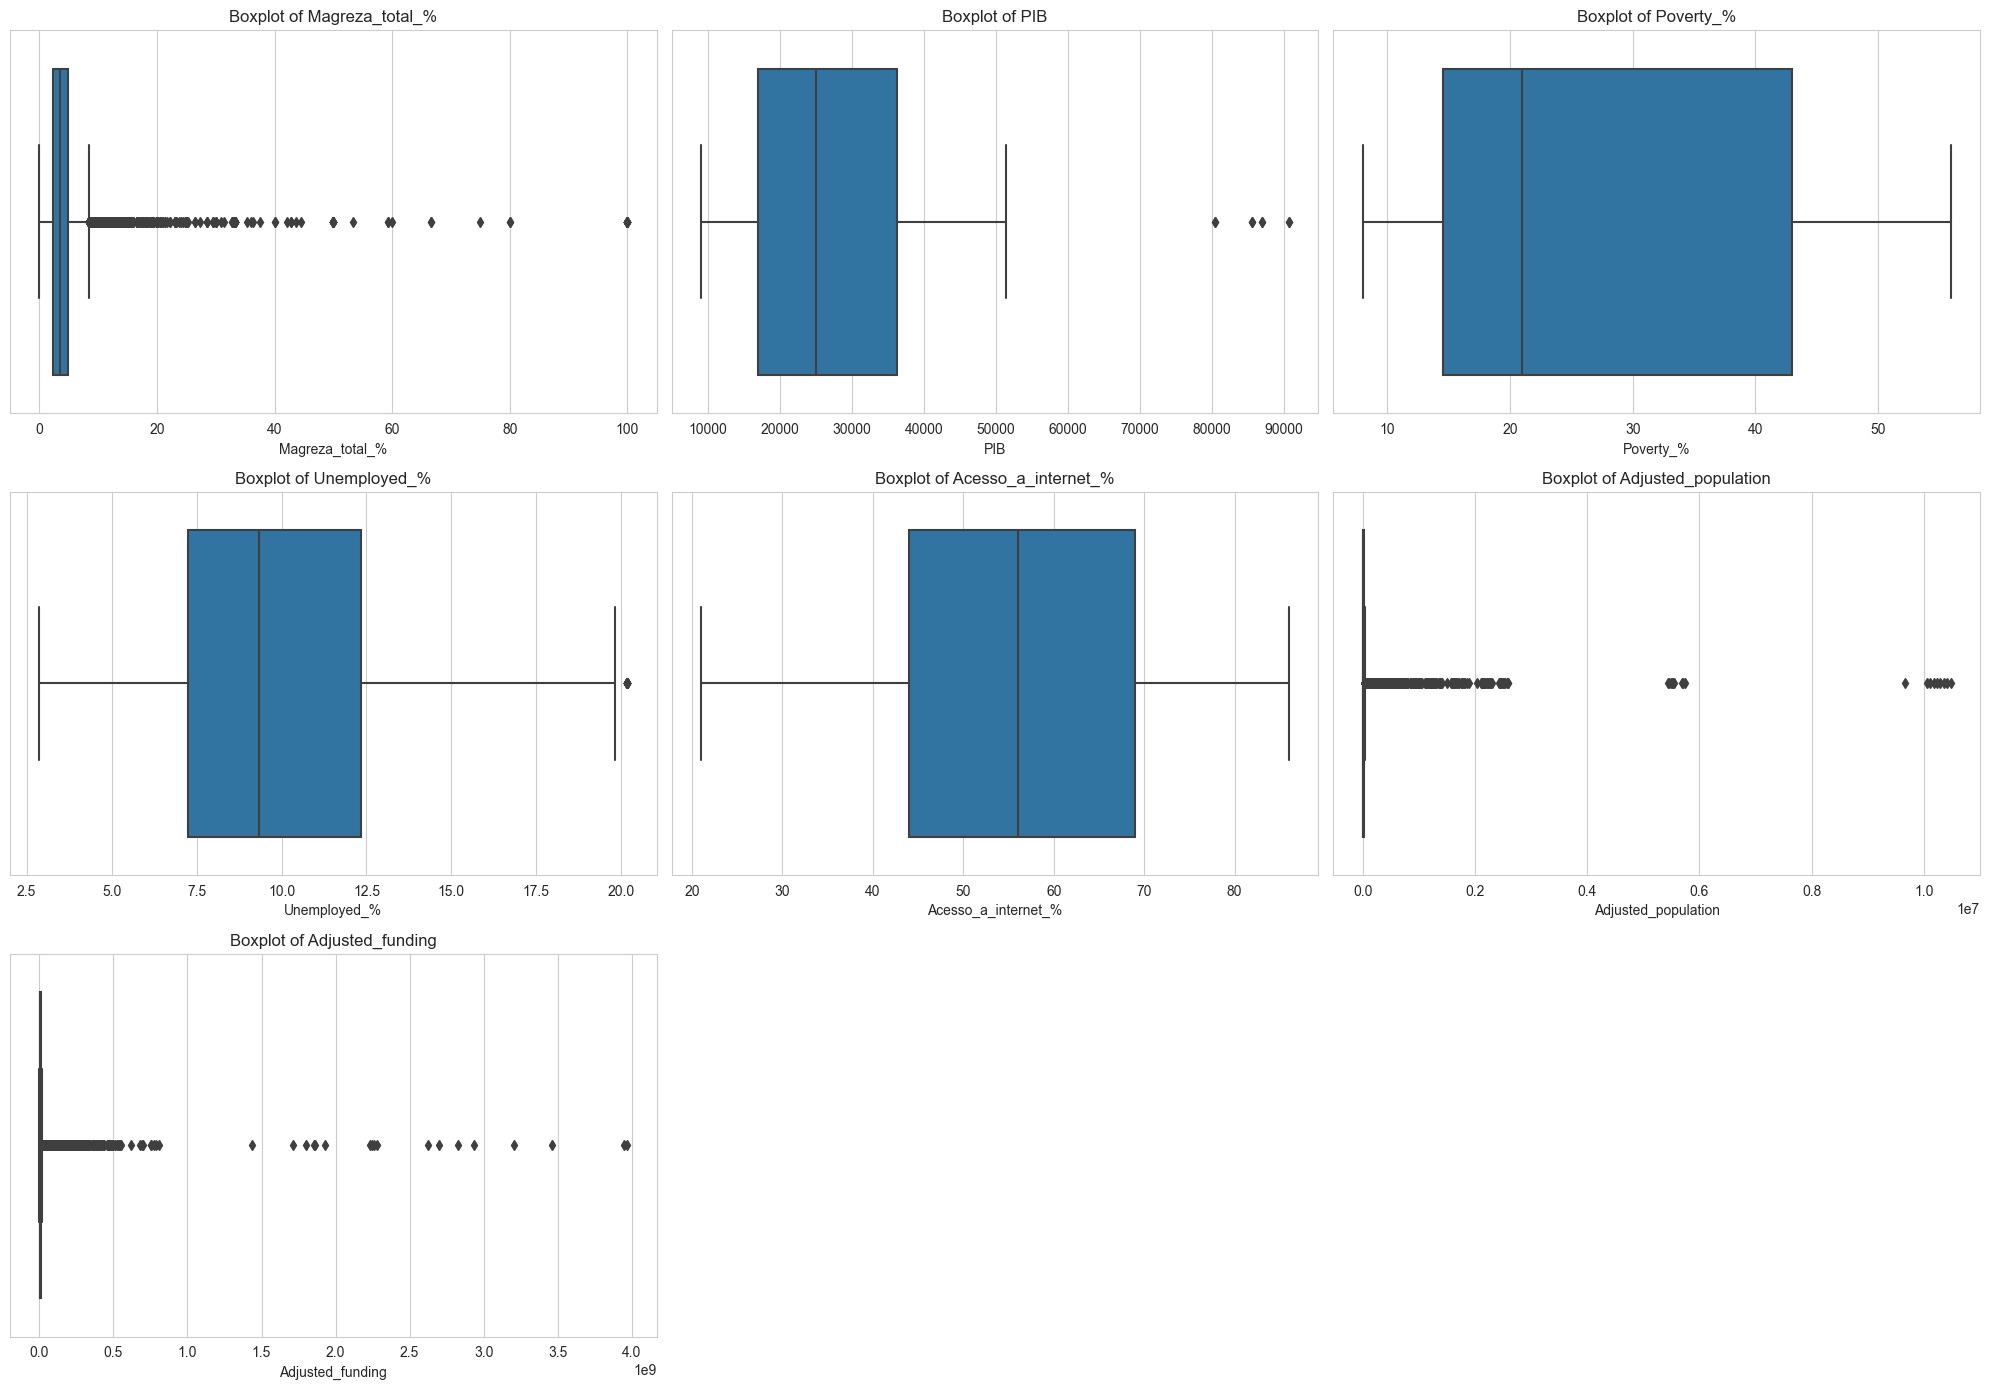

In [69]:
# Set up the matplotlib figure
plt.figure(figsize=(20, 14))

# Loop through each feature to plot boxplots for outlier detection
for i, feature in enumerate(selected_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()


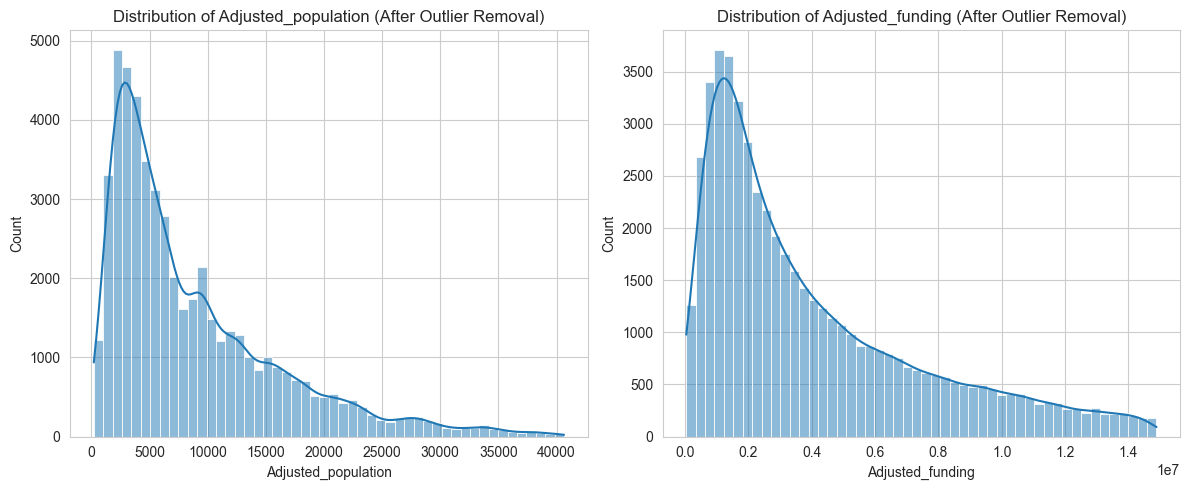

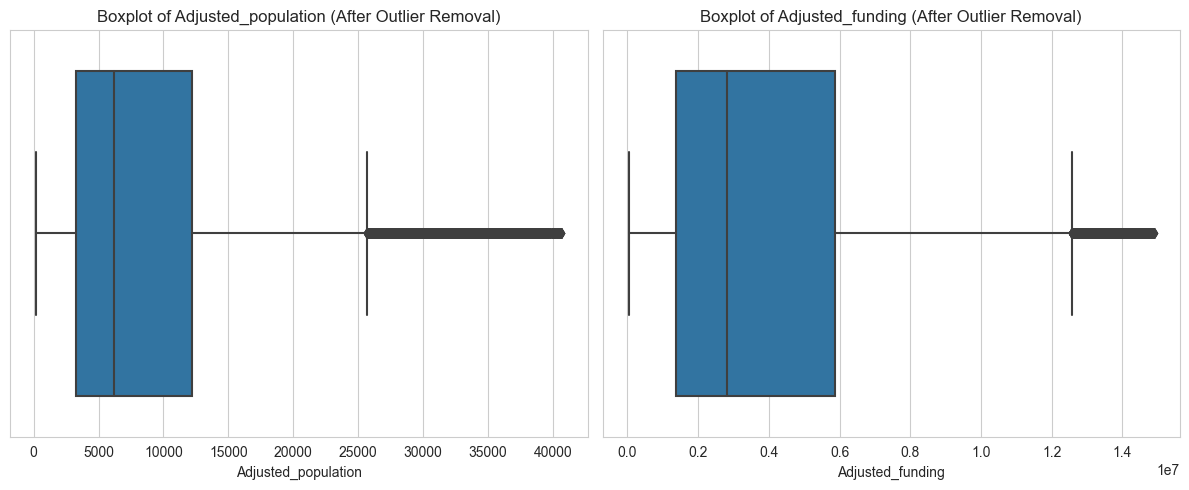

In [71]:
# Function to remove outliers based on IQR
def remove_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out the outliers
    filtered_df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
    return filtered_df

# Features with many outliers to be removed
features_with_outliers = ['Adjusted_population', 'Adjusted_funding']

# Remove outliers and store the filtered data
filtered_df = df.copy()
for feature in features_with_outliers:
    filtered_df = remove_outliers(filtered_df, feature)

# Show statistics after removing outliers
filtered_df[features_with_outliers].describe()

# Set up the matplotlib figure
plt.figure(figsize=(12, 5))

# Loop through each feature to plot
for i, feature in enumerate(features_with_outliers, 1):
    plt.subplot(1, 2, i)
    sns.histplot(filtered_df[feature], bins=50, kde=True)
    plt.title(f'Distribution of {feature} (After Outlier Removal)')

plt.tight_layout()
plt.show()

# Boxplot after removing outliers
plt.figure(figsize=(12, 5))

# Loop through each feature to plot boxplots
for i, feature in enumerate(features_with_outliers, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(x=filtered_df[feature])
    plt.title(f'Boxplot of {feature} (After Outlier Removal)')

plt.tight_layout()
plt.show()



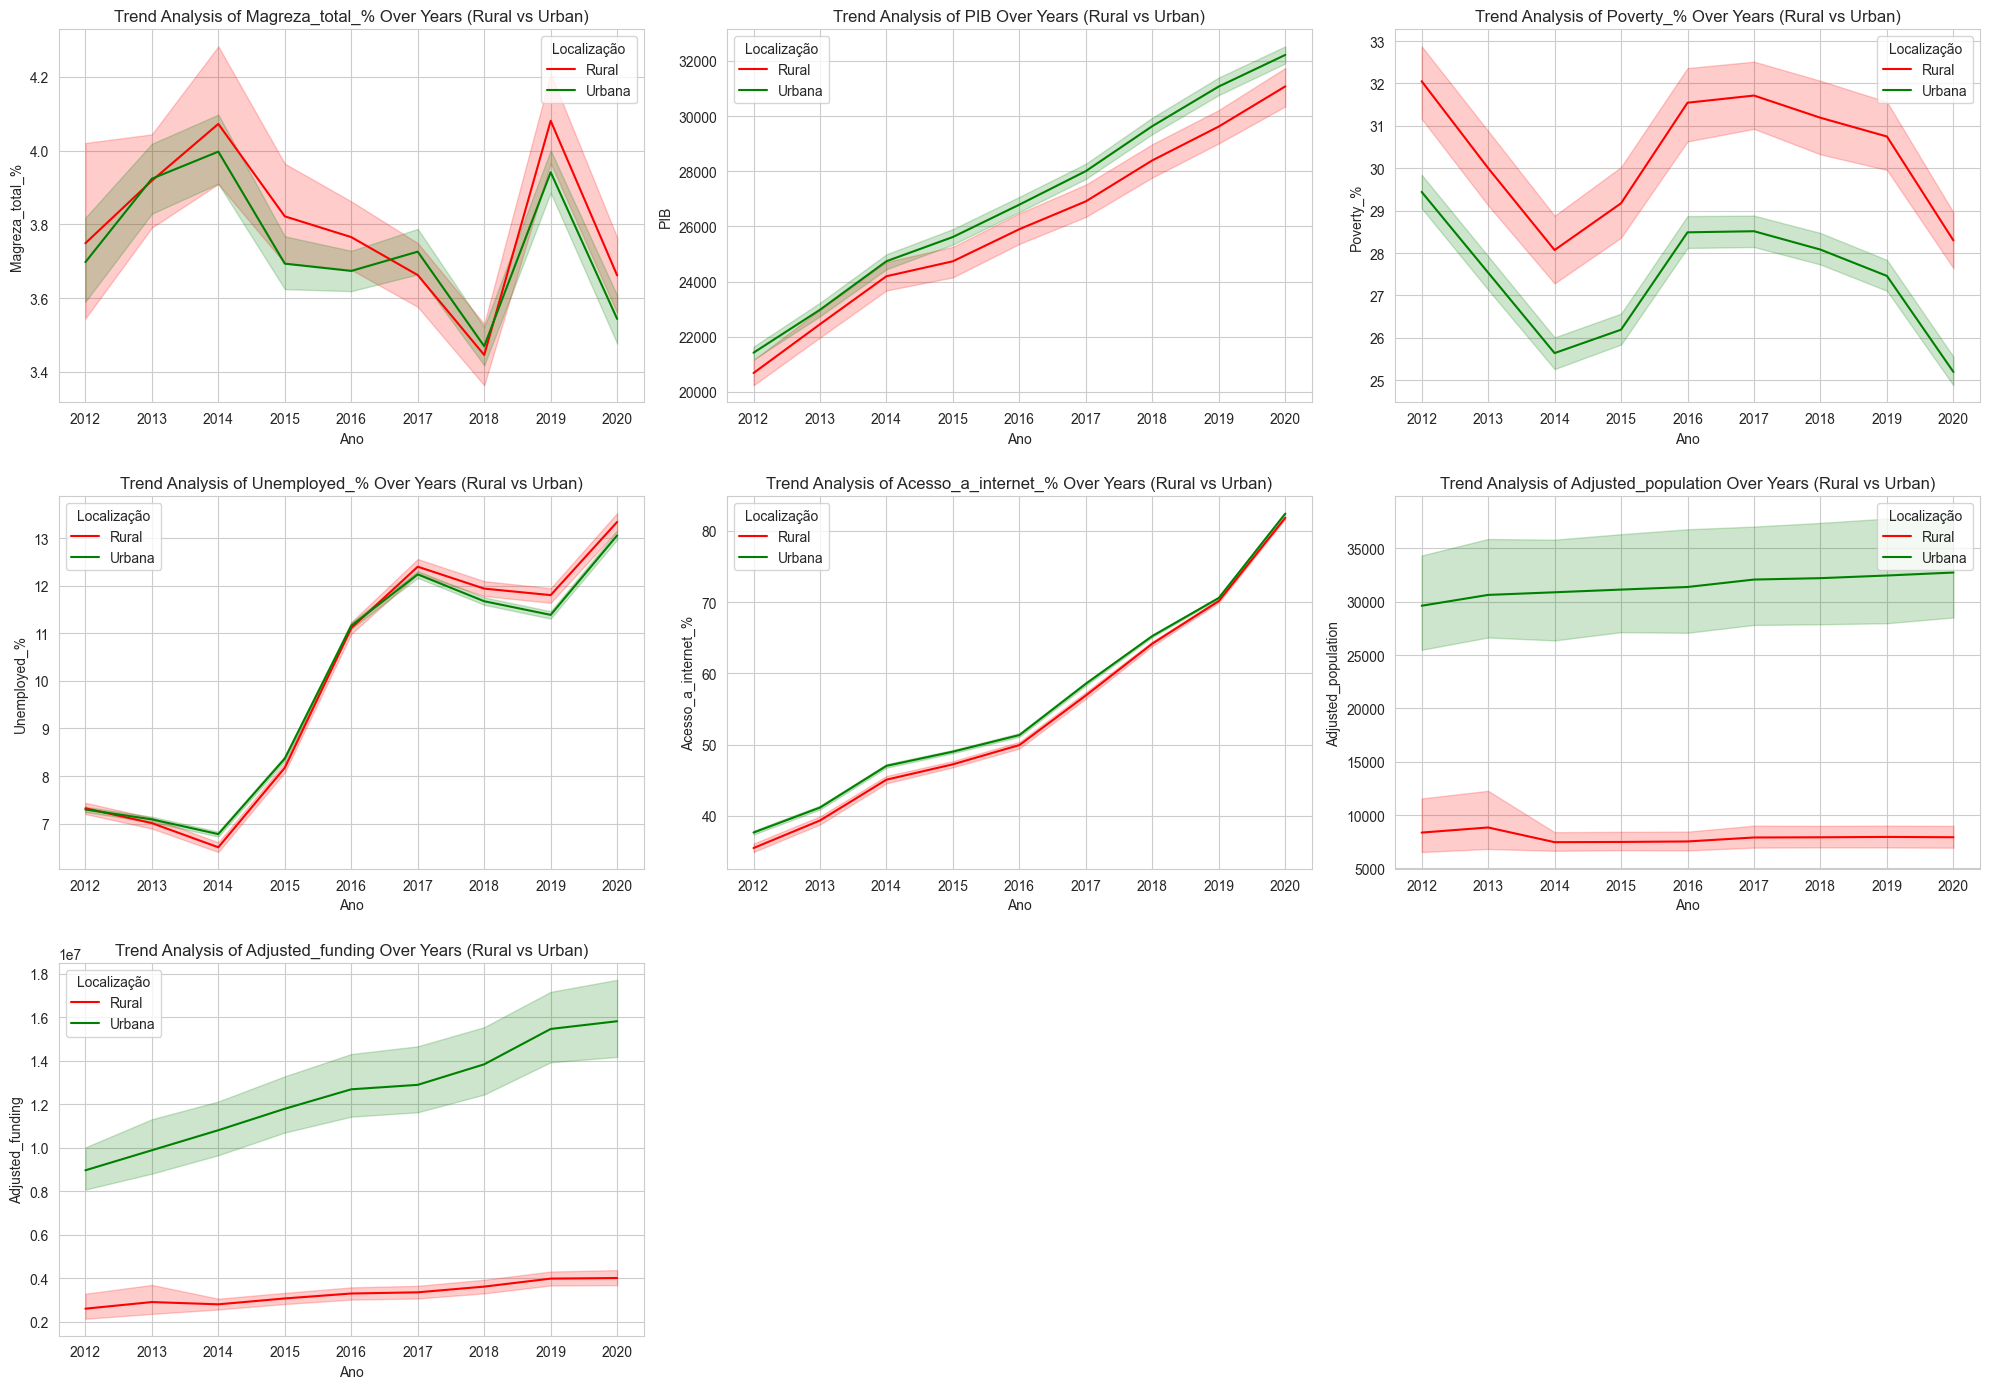

In [72]:
# Set up the matplotlib figure
plt.figure(figsize=(20, 14))

# Loop through each feature to plot trends over years, categorized by 'Rural' and 'Urban'
for i, feature in enumerate(selected_features, 1):
    plt.subplot(3, 3, i)
    sns.lineplot(x="Ano", y=feature, hue="Localização", palette={"Rural": "red", "Urbana": "green"}, data=df)
    plt.title(f'Trend Analysis of {feature} Over Years (Rural vs Urban)')

plt.tight_layout()
plt.show()


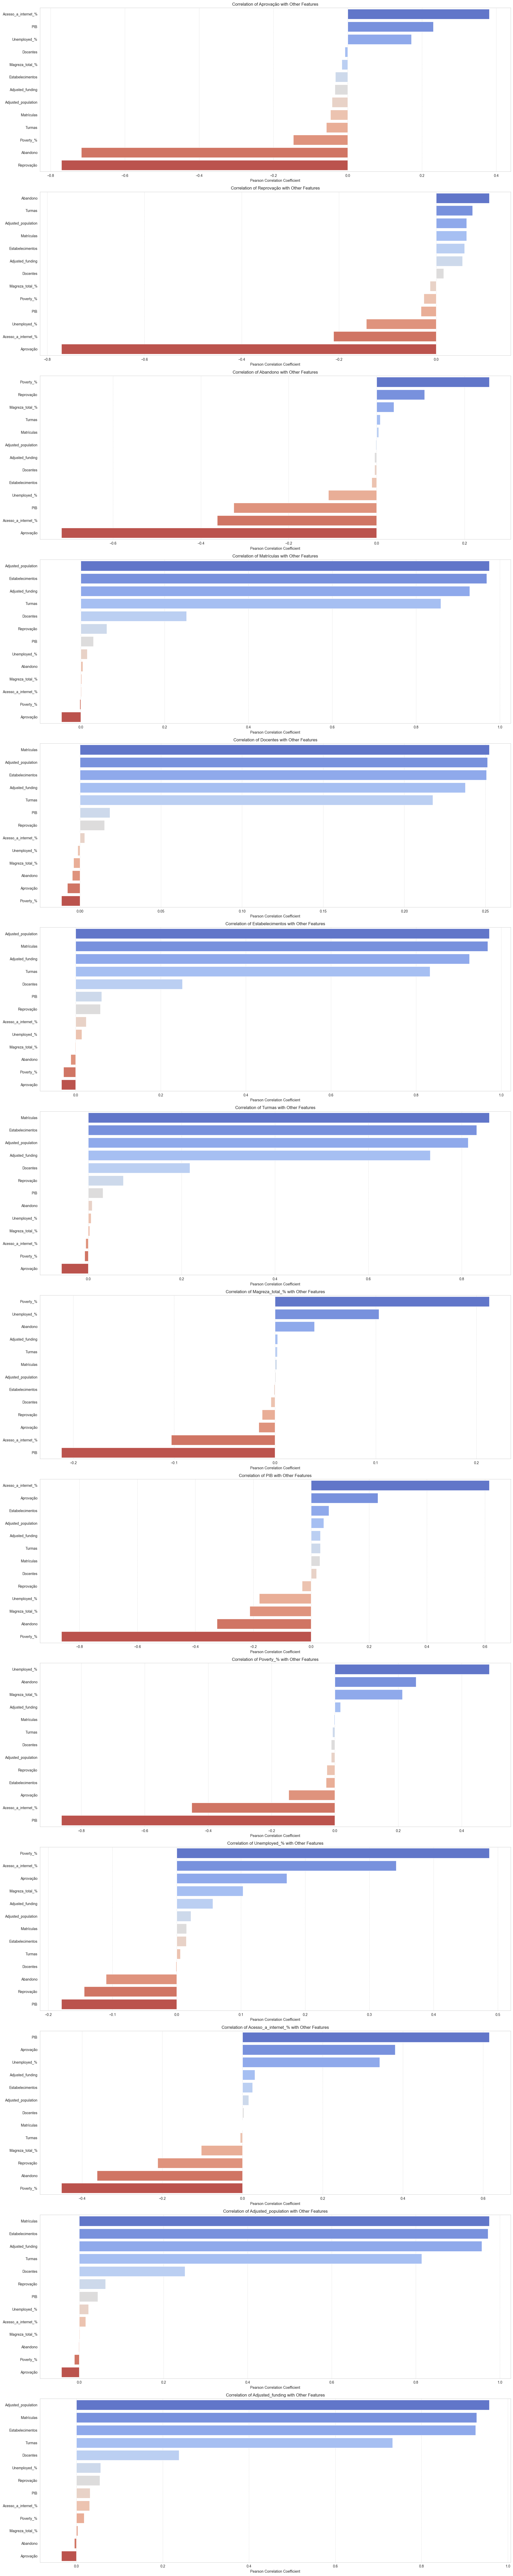

In [82]:
# List of features for correlation analysis against socio-economic features
features_to_correlate = [
    'Aprovação',
    'Reprovação',
    'Abandono',
    'Matrículas',
    'Docentes',
    'Estabelecimentos',
    'Turmas',
    'Magreza_total_%',
    'PIB',
    'Poverty_%',
    'Unemployed_%',
    'Acesso_a_internet_%',
    'Adjusted_population',
    'Adjusted_funding'
]

# Create subplots
fig, axes = plt.subplots(nrows=14, ncols=1, figsize=(20, 100))

# Plotting the correlations for each feature
for idx, feature in enumerate(features_to_correlate):
    correlation_values = df[features_to_correlate].corr()[feature].drop(feature)
    sorted_correlations = correlation_values.sort_values(ascending=False)
    
    sns.barplot(x=sorted_correlations.values, y=sorted_correlations.index, palette="coolwarm", ax=axes[idx])
    axes[idx].set_title(f'Correlation of {feature} with Other Features')
    axes[idx].set_xlabel('Pearson Correlation Coefficient')
    axes[idx].grid(True, which='both', linestyle='--', linewidth=0.5, axis='x')

plt.tight_layout()
plt.show()



Summary
- Most obersevations are untuitive.
- Poverty is bimodel and I am not sure why. 


Thinness
- Rightly-skewed Mean around 3%, with some outliers beyong 10%
- Rates are higher in rural than urgen and trend usually stable, with minor fluctuations
- +ve corelation with GDP per capita and internet access.

GDP per Capita
- Rightly-skewed Mean around 26k, outliers beyong 50k
- GDP per capita trends +ve over the years in bith rural and urban areas
- Strong -ve corelation with Poverty and moderate +ve with Internet acess

Poverty
- Is Bi-modal. Why? Has no significant outliers.
- Significantly higher in rural areas than Urban.
- Trending decreasing ovee the years in both regions.
- Strong -ve corelation with GDP per capita

Unemployment
- Normally distributed, mean aroung 9-10%, very outliers beyong 17%
- Trending upward and higher in Rural compared Urben in recent years
- Moderately +ve corelated to Poverty and slightly -ve corelated to PIB

Internet Access
- Somewhat bimodal, peaking aroung 45% and 65%. No significent outliers.
- Increasing tend over time for both Urban and Rural
- Corelated +ve to PIB and -vely to Poverty


Population
- Highly rightly-skewed, indicating many areas with lower population. Large number of outliers on the higher end. Distribution is rightly skewed even after removing outliers.
    - Mean aroung 6k to 12k after outliers are removed
- Population is increasing more rapidly in urben compared to rural
- Highly corellated to enrollments, schools and funding

Funding 
- Highly rightly-skewed, indicating many areas with lower population. Large number of outliers on the higher end. Distribution is rightly skewed even after removing outliers.
    - Mean under 6M once outliers are removed
- Funding trend also increasing more in Urban than rural
- Highly corelated to population, Number of enrollments and schools

## Feature Engineering 

In [105]:
df.head(3)

Ano  Código_IBGE Localização  Aprovação  Reprovação  Abandono  Matrículas  \
0  2012      1100023       Rural  92.599998         4.0       3.4         498   
1  2012      1100023      Urbana  69.900002        16.6      13.5        3453   
2  2012      1100031       Rural  92.099998         2.6       5.3          38   

   Docentes  Estabelecimentos  Turmas  ...  Poverty_%  Unemployed_%  \
0        42                 1      15  ...  31.610001          6.35   
1       172                 6     136  ...  31.610001          6.35   
2         6                 1       3  ...  31.610001          6.35   

   Código_UF    Estado  UF  Município Região Acesso_a_internet_%  \
0         11  Rondônia  RO  Ariquemes  Norte                  21   
1         11  Rondônia  RO  Ariquemes  Norte                  21   
2         11  Rondônia  RO     Cabixi  Norte                  21   

  Adjusted_population  Adjusted_funding  
0            13912.05      5.327668e+06  
1            78834.95      3.019012e+07  
2              919.80      2.282065e+05  

[3 rows x 22 columns]

In [108]:
# 1. Funding Per Capita
df['Funding_Per_Capita'] = df['Adjusted_funding'] / df['Adjusted_population']

# 2. Teacher-Student Ratio
df['Teacher_Student_Ratio'] = df['Docentes'] / df['Matrículas']

# 3. Educational Infrastructure Index
df['Educational_Infrastructure_Index'] = df['Estabelecimentos'] / df['Adjusted_population']

# 4. Number of students passing
df['Students_Passing'] = (df['Aprovação'] / 100) * df['Matrículas']

# 5. Number of students failing
df['Students_Failing'] = (df['Reprovação'] / 100) * df['Matrículas']

# 6. Number of students dropping out
df['Students_DroppingOut'] = (df['Abandono'] / 100) * df['Matrículas']

# 7. Number of students dropping out per batch
df['Students_Passing_Per_Batch'] = df['Students_Passing']/df['Turmas']

# 8. Number of students dropping out per batch
df['Students_Failing_Per_Batch'] = df['Students_Failing']/df['Turmas']

# 9. Number of students dropping out per batch
df['Students_DroppingOut_Per_Batch'] = df['Students_DroppingOut']/df['Turmas']

In [109]:
df.head(3)

Ano  Código_IBGE Localização  Aprovação  Reprovação  Abandono  Matrículas  \
0  2012      1100023       Rural  92.599998         4.0       3.4         498   
1  2012      1100023      Urbana  69.900002        16.6      13.5        3453   
2  2012      1100031       Rural  92.099998         2.6       5.3          38   

   Docentes  Estabelecimentos  Turmas  ...  Funding_Per_Capita  \
0        42                 1      15  ...          382.953489   
1       172                 6     136  ...          382.953489   
2         6                 1       3  ...          248.104491   

   Teacher_Student_Ratio  Educational_Infrastructure_Index  Students_Passing  \
0               0.084337                          0.000072        461.148000   
1               0.049812                          0.000076       2413.647003   
2               0.157895                          0.001087         34.998000   

   Students_Failing Students_DroppingOut Students_DroppingOut_per_batch  \
0          19.92000            16.932001                       1.128800   
1         573.19803           466.155019                       3.427610   
2           0.98800             2.014000                       0.671333   

  Students_Passing_Per_Batch Students_Failing_Per_Batch  \
0                  30.743200                   1.328000   
1                  17.747404                   4.214691   
2                  11.666000                   0.329333   

   Students_DroppingOut_Per_Batch  
0                        1.128800  
1                        3.427610  
2                        0.671333  

[3 rows x 32 columns]

In [115]:
# Sort the dataframe by 'Ano' (Year), 'Código_IBGE', and 'Localização' (Location)
df.sort_values(by=['Código_IBGE', 'Localização', 'Ano'], inplace=True)

# Calculate the Population and PIB Growth Rates
# Group by 'Código_IBGE' and 'Localização' and then calculate the percentage change for 'Adjusted_population' and 'PIB'

#10. Population growth rate
df['Population_Growth_Rate_Calc'] = df.groupby(['Código_IBGE', 'Localização'])['Adjusted_population'].pct_change() * 100

#11 GDP per capita growth rate
df['PIB_Growth_Rate'] = df.groupby(['Código_IBGE', 'Localização'])['PIB'].pct_change() * 100

/var/folders/3b/gl16xrd93txb9yh4g5v099740000gn/T/ipykernel_35928/600549472.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by=['Código_IBGE', 'Localização', 'Ano'], inplace=True)
/var/folders/3b/gl16xrd93txb9yh4g5v099740000gn/T/ipykernel_35928/600549472.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Population_Growth_Rate_Calc'] = df.groupby(['Código_IBGE', 'Localização'])['Adjusted_population'].pct_change() * 100
/var/folders/3b/gl16xrd93txb9yh4g5v099740000gn/T/ipykernel_35928/600549472.py:11: SettingWithCopyWarning: 
A value is tryin

In [117]:
df = df.dropna()

In [118]:
df

Ano  Código_IBGE Localização  Aprovação  Reprovação  Abandono  \
41284  2018      1100015       Rural  87.099998        12.9       0.0   
48236  2019      1100015       Rural  83.000000        17.0       0.0   
55200  2020      1100015       Rural  86.199997        13.8       0.0   
16304  2014      1100015      Urbana  85.699997         5.0       9.3   
23236  2015      1100015      Urbana  85.500000         3.3      11.2   
...     ...          ...         ...        ...         ...       ...   
58042  2020      5222302      Urbana  96.099998         3.1       0.8   
51060  2019      5300108       Rural  85.800003        11.4       2.8   
58043  2020      5300108       Rural  84.199997        15.8       0.0   
51061  2019      5300108      Urbana  83.000000        12.2       4.8   
58044  2020      5300108      Urbana  84.000000        15.3       0.7   

       Matrículas  Docentes  Estabelecimentos  Turmas  ...  \
41284          31        26                 2       5  ...   
48236          53        20                 3       7  ...   
55200          58        29                 3       8  ...   
16304        1046        85                 2      52  ...   
23236        1018      3432                 2      48  ...   
...           ...       ...               ...     ...  ...   
58042         132        14                 1       6  ...   
51060        2523       223                14      91  ...   
58043         278       222                14      97  ...   
51061       81581      3577                90       2  ...   
58044        8383      3602                94       2  ...   

       Educational_Infrastructure_Index  Students_Passing  Students_Failing  \
41284                          0.000576         27.001000          3.999000   
48236                          0.000872         43.989999          9.010000   
55200                          0.000880         49.995999          8.004000   
16304                          0.000092        896.421993         52.300001   
23236                          0.000092        870.390019         33.594000   
...                                 ...               ...               ...   
58042                          0.000200        126.851995          4.092000   
51060                          0.000031       2164.734101        287.621981   
58043                          0.000031        234.075986         43.924002   
51061                          0.000035      67712.228638       9952.882112   
58044                          0.000036       7041.719780       1282.598976   

       Students_DroppingOut  Students_DroppingOut_per_batch  \
41284              0.000000                        0.000000   
48236              0.000000                        0.000000   
55200              0.000000                        0.000000   
16304             97.278002                        1.870731   
23236            114.015996                        2.375333   
...                     ...                             ...   
58042              1.056000                        0.176000   
51060             70.643997                        0.776308   
58043              0.000000                        0.000000   
51061           3915.888034                     1957.944017   
58044             58.680998                       29.340499   

      Students_Passing_Per_Batch Students_Failing_Per_Batch  \
41284                   5.400200                   0.799800   
48236                   6.284286                   1.287143   
55200                   6.249500                   1.000500   
16304                  17.238884                   1.005769   
23236                  18.133125                   0.699875   
...                          ...                        ...   
58042                  21.141999                   0.682000   
51060                  23.788287                   3.160681   
58043                   2.413154                   0.452825   
51061               33856.114319                49

In [121]:
df_numeric = df.select_dtypes(include=['number'])

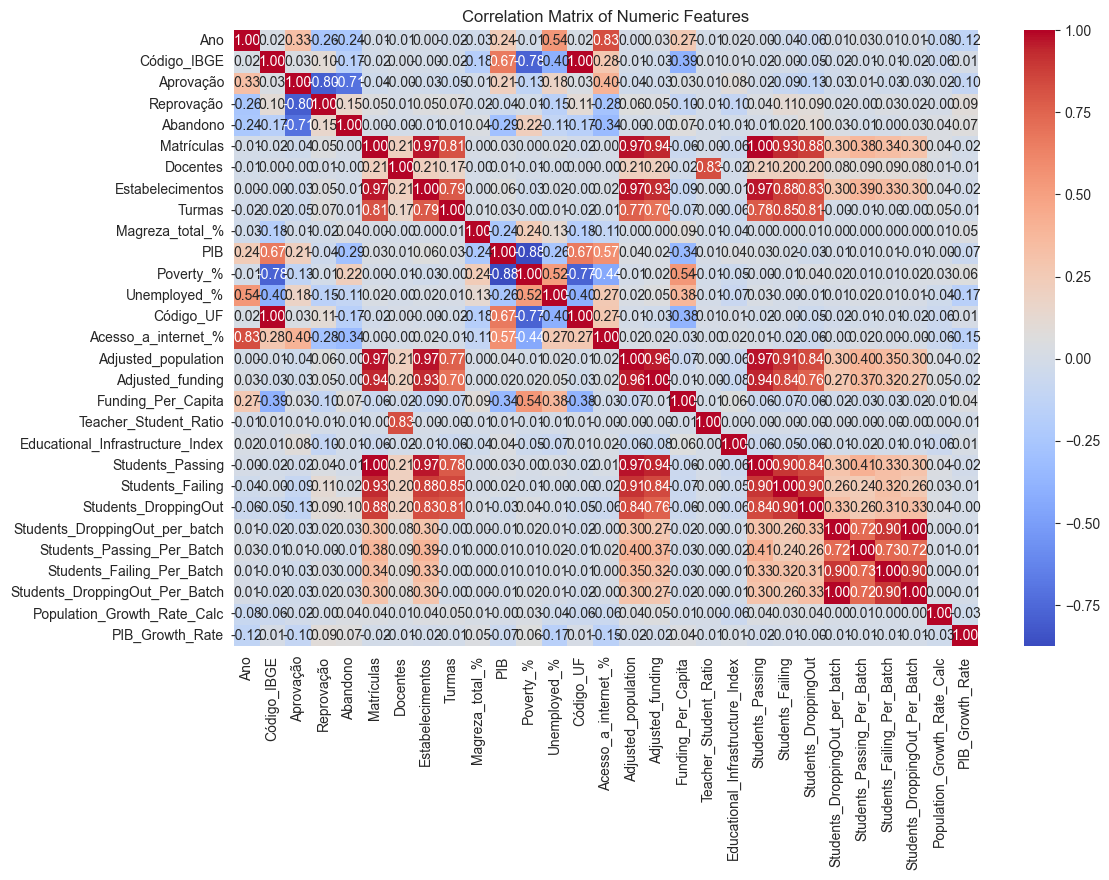

In [123]:
correlation_matrix = df_numeric.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True, fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [124]:
df_numeric.dtypes

Ano                                   int16
Código_IBGE                           int32
Aprovação                           float32
Reprovação                          float32
Abandono                            float32
Matrículas                            int32
Docentes                              int32
Estabelecimentos                      int16
Turmas                                int16
Magreza_total_%                     float32
PIB                                 float64
Poverty_%                           float32
Unemployed_%                        float32
Código_UF                             int16
Acesso_a_internet_%                   int16
Adjusted_population                 float64
Adjusted_funding                    float64
Funding_Per_Capita                  float64
Teacher_Student_Ratio               float64
Educational_Infrastructure_Index    float64
Students_Passing                    float64
Students_Failing                    float64
Students_DroppingOut            

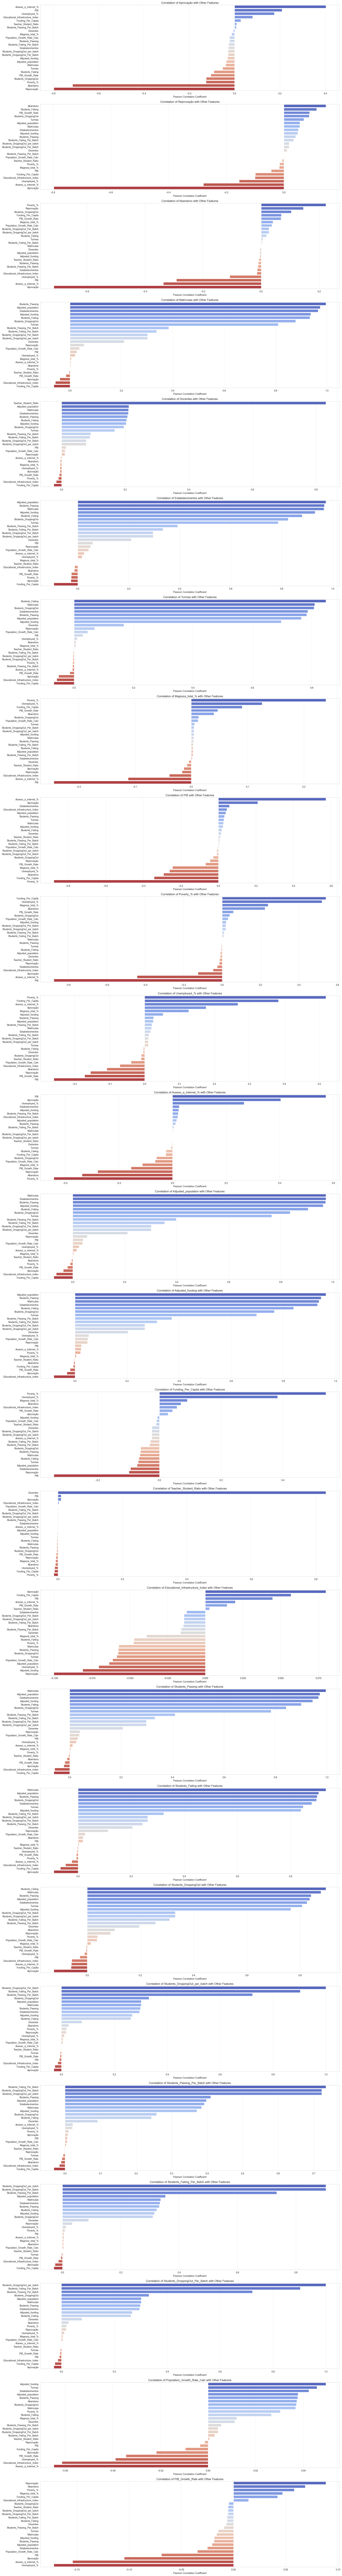

In [128]:
# List of features for correlation analysis against socio-economic features
features_to_correlate = [
    'Aprovação',
    'Reprovação',
    'Abandono',
    'Matrículas',
    'Docentes',
    'Estabelecimentos',
    'Turmas',
    'Magreza_total_%',
    'PIB',
    'Poverty_%',
    'Unemployed_%',
    'Acesso_a_internet_%',
    'Adjusted_population',
    'Adjusted_funding',
    'Funding_Per_Capita',
    'Teacher_Student_Ratio',
    'Educational_Infrastructure_Index',
    'Students_Passing',
    'Students_Failing',
    'Students_DroppingOut',
    'Students_DroppingOut_per_batch',
    'Students_Passing_Per_Batch',
    'Students_Failing_Per_Batch',
    'Students_DroppingOut_Per_Batch',
    'Population_Growth_Rate_Calc',
    'PIB_Growth_Rate'
]

# Create subplots
fig, axes = plt.subplots(nrows=26, ncols=1, figsize=(20, 150))

# Plotting the correlations for each feature
for idx, feature in enumerate(features_to_correlate):
    correlation_values = df[features_to_correlate].corr()[feature].drop(feature)
    sorted_correlations = correlation_values.sort_values(ascending=False)
    
    sns.barplot(x=sorted_correlations.values, y=sorted_correlations.index, palette="coolwarm", ax=axes[idx])
    axes[idx].set_title(f'Correlation of {feature} with Other Features')
    axes[idx].set_xlabel('Pearson Correlation Coefficient')
    axes[idx].grid(True, which='both', linestyle='--', linewidth=0.5, axis='x')

plt.tight_layout()
plt.show()



### Teachers and Student Passing, Failing and Drop out rates

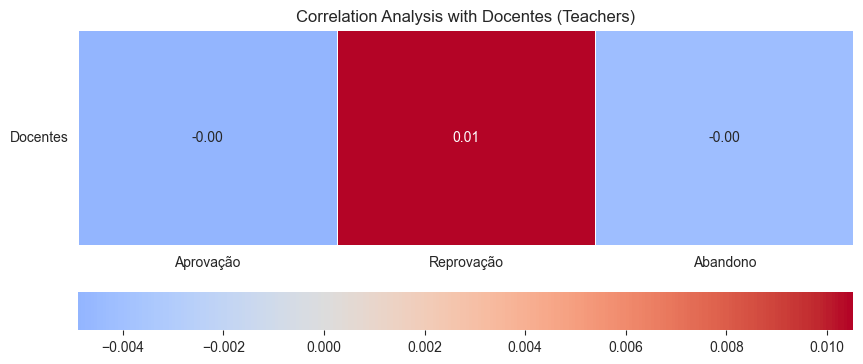

In [129]:
# Define the list of features for correlation analysis against 'Docentes'
correlation_features_with_docentes = ['Aprovação', 'Reprovação', 'Abandono']

# Calculate the correlation matrix for the specified features
correlation_matrix_docentes = df[['Docentes'] + correlation_features_with_docentes].corr()

# Filter out the correlations of 'Docentes' against the selected features
correlation_matrix_docentes_filtered = correlation_matrix_docentes.loc[['Docentes'], correlation_features_with_docentes]

# Plot horizontal color bar charts for visualization
plt.figure(figsize=(10, 4))
sns.heatmap(correlation_matrix_docentes_filtered, annot=True, cmap='coolwarm', cbar=True, fmt=".2f", 
            center=0, linewidths=.5, cbar_kws={"orientation": "horizontal"})
plt.title('Correlation Analysis with Docentes (Teachers)')
plt.yticks(rotation=0)
plt.show()


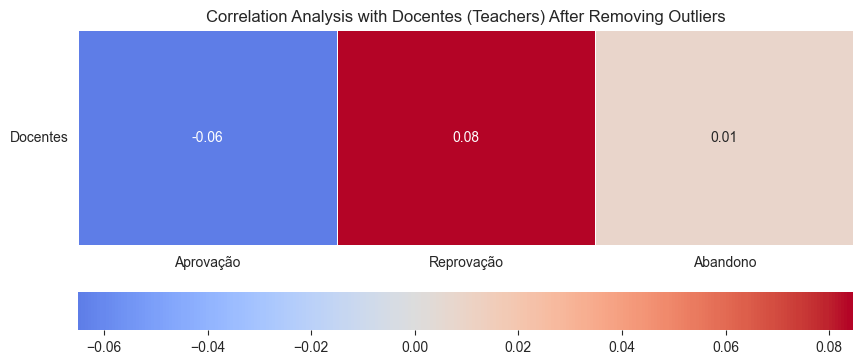

In [130]:
# Function to remove outliers based on IQR
def remove_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out the outliers
    filtered_df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
    return filtered_df

# Remove outliers in the 'Docentes' column using the IQR method
filtered_df_docentes = remove_outliers(df, 'Docentes')

# Calculate the correlation matrix for the specified features after removing outliers
correlation_matrix_docentes_filtered = filtered_df_docentes[['Docentes'] + correlation_features_with_docentes].corr()

# Filter out the correlations of 'Docentes' against the selected features
correlation_matrix_docentes_filtered = correlation_matrix_docentes_filtered.loc[['Docentes'], correlation_features_with_docentes]

# Plot horizontal color bar charts for visualization
plt.figure(figsize=(10, 4))
sns.heatmap(correlation_matrix_docentes_filtered, annot=True, cmap='coolwarm', cbar=True, fmt=".2f", 
            center=0, linewidths=.5, cbar_kws={"orientation": "horizontal"})
plt.title('Correlation Analysis with Docentes (Teachers) After Removing Outliers')
plt.yticks(rotation=0)
plt.show()


In [131]:
def optimize_memory_drop_duplicates(dataframe):
    return compress(dataframe).drop_duplicates()
        

In [152]:
df = pd.read_csv("../raw_data/all_pib_ML.csv")

In [153]:
df =  optimize_memory_drop_duplicates(df)

old dataframe size:  10.91 MB
optimized size by 32.0 %
new DataFrame size:  7.47  MB


In [154]:
df.dtypes

Unnamed: 0               int32
Ano                      int16
Código_IBGE              int32
Localização             object
Aprovação              float32
Reprovação             float32
Abandono               float32
Matrículas              object
Docentes                 int32
Estabelecimentos         int16
Turmas                  object
Regiao                  object
Código UF                 int8
UF                      object
Municipio               object
Magreza %               object
Acesso a internet %       int8
Unemployed              object
Poverty_Rate           float32
PIB                    float64
Population               int32
Valor_Consolidado      float64
Pib per capita          object
dtype: object

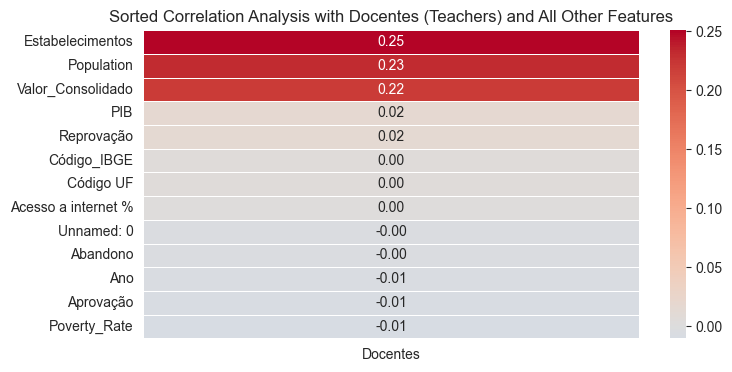

In [159]:
df_numeric = df.select_dtypes(include=['number'])

# Calculate the complete correlation matrix for the dataset
correlation_matrix_complete = df_numeric.corr()

# Filter out the correlations of 'Docentes' against all other features
correlation_matrix_docentes_complete = correlation_matrix_complete.loc[:, ['Docentes']].drop(['Docentes'])

# Sort the correlation values in descending order for easier interpretation
sorted_correlation_matrix_docentes = correlation_matrix_docentes_complete.sort_values(by='Docentes', ascending=False)

# Plot vertical color bar charts for the sorted visualization
plt.figure(figsize=(8, 4))
sns.heatmap(sorted_correlation_matrix_docentes, annot=True, cmap='coolwarm', cbar=True, fmt=".2f", 
            center=0, linewidths=.5, cbar_kws={"orientation": "vertical"})
plt.title('Sorted Correlation Analysis with Docentes (Teachers) and All Other Features')
plt.xticks(rotation=0)
plt.show()